# Kaggle Competition: Identify Age-related Conditions _(Classificaition Problem)_

## Introduction

The goal of this competition is to predict if a person has any of three medical conditions. You are being asked to predict if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0)

To determine if someone has these medical conditions requires a long and intrusive process to collect information from patients. With predictive models, we can shorten this process and keep patient details private by collecting key characteristics relative to the conditions, then encoding these characteristics.

This is a Kaggle Competition with more than 5300 teams. I am trying to use/ensemble different models to predict if a person has any of three medical condtions. 

url: https://www.kaggle.com/competitions/icr-identify-age-related-conditions

## Evaluation

$$LogLoss = \frac{-\frac{1}{N_0} \Sigma_{i=1}^{N_0} y_{0i}log p_{0i}- \frac{1}{N_1} \Sigma_{i=1}^{N_1} y_{1i}log p_{1i}}{2}$$

## Import and Display

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# import the dataset
dataset = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")
print(dataset.shape)

(617, 58)


In [3]:
# function to create scrollable table
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [5]:
# Select all numerical features
num_features = dataset.select_dtypes(include='float64')
stats = num_features.describe().T
html_num = create_scrollable_table(stats, "numerical_features", "Summary Statistics of Numerical Features")
display(HTML(html_num))

,count,mean,std,min,25%,50%,75%,max
AB,617.0,0.477149,0.468388,0.081187,0.252107,0.354659,0.559763,6.161666
AF,617.0,3502.013221,2300.322717,192.593280,2197.345480,3120.318960,4361.637390,28688.187660
AH,617.0,118.624513,127.838950,85.200147,85.200147,85.200147,113.739540,1910.123198
AM,617.0,38.968552,69.728226,3.177522,12.270314,20.533110,39.139886,630.518230
AR,617.0,10.128242,10.518877,8.138688,8.138688,8.138688,8.138688,178.943634
AX,617.0,5.545576,2.551696,0.699861,4.128294,5.031912,6.431634,38.270880
AY,617.0,0.060320,0.416817,0.025578,0.025578,0.025578,0.036845,10.315851
AZ,617.0,10.566447,4.350645,3.396778,8.129580,10.461320,12.969516,38.971568
BC,617.0,8.053012,65.166943,1.229900,1.229900,1.229900,5.081244,1463.693448
BD,617.0,5350.388655,3021.326641,1693.624320,4155.702870,4997.960730,6035.885700,53060.599240


          AB        AF        AH        AM        AR        AX        AY  \
AB  1.000000  0.350231  0.249246  0.530687  0.157712  0.471912  0.011004   
AF  0.350231  1.000000  0.044140  0.183961  0.044917  0.248439  0.039417   
AH  0.249246  0.044140  1.000000  0.128268  0.749794  0.039324  0.055385   
AM  0.530687  0.183961  0.128268  1.000000  0.175212  0.225382  0.081666   
AR  0.157712  0.044917  0.749794  0.175212  1.000000  0.011715  0.099947   

          AZ        BC       BD   ...        FI        FL        FR        FS  \
AB  0.158569  0.331736  0.278920  ...  0.004967  0.169934  0.017990  0.036913   
AF  0.219172  0.058831  0.045430  ...  0.021914  0.148289  0.021009 -0.003108   
AH  0.095627  0.366910  0.209508  ...  0.035902 -0.022822 -0.009112  0.018328   
AM  0.131885  0.329658  0.277908  ... -0.038974  0.187974 -0.009183  0.040846   
AR  0.099282  0.073730 -0.002509  ...  0.018049  0.080164 -0.007933  0.068271   

          GB        GE        GF        GH        GI    

<Axes: >

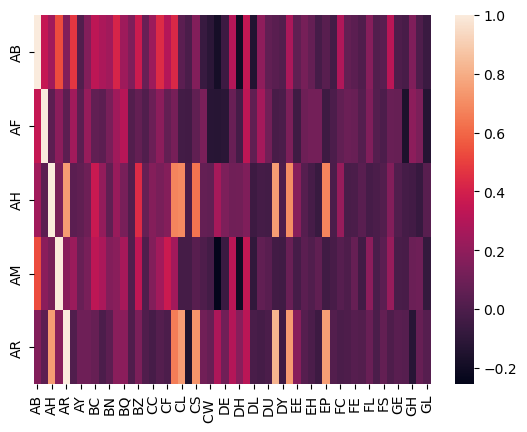

In [6]:
# Correlation Matrix
print(num_features.corr().head())
sns.heatmap(num_features.corr().head())

In [7]:
# Select all categorical features, which in this case, only EJ
cat_features = dataset[['EJ']]
stats = cat_features.describe().T
html_num = create_scrollable_table(stats, "categorical_features", "Summary Statistics of Categorical Features")
display(HTML(html_num))

,count,unique,top,freq
EJ,617,2,B,395


## Basic Data Cleaning and Feature Exploration

### Missing Values

In [8]:
# Null values in the dataset
null_values = dataset.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (dataset.isnull().sum() / len(dataset)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
Id,0
AB,0
AF,0
AH,0
AM,0
AR,0
AX,0
AY,0
AZ,0
BC,0


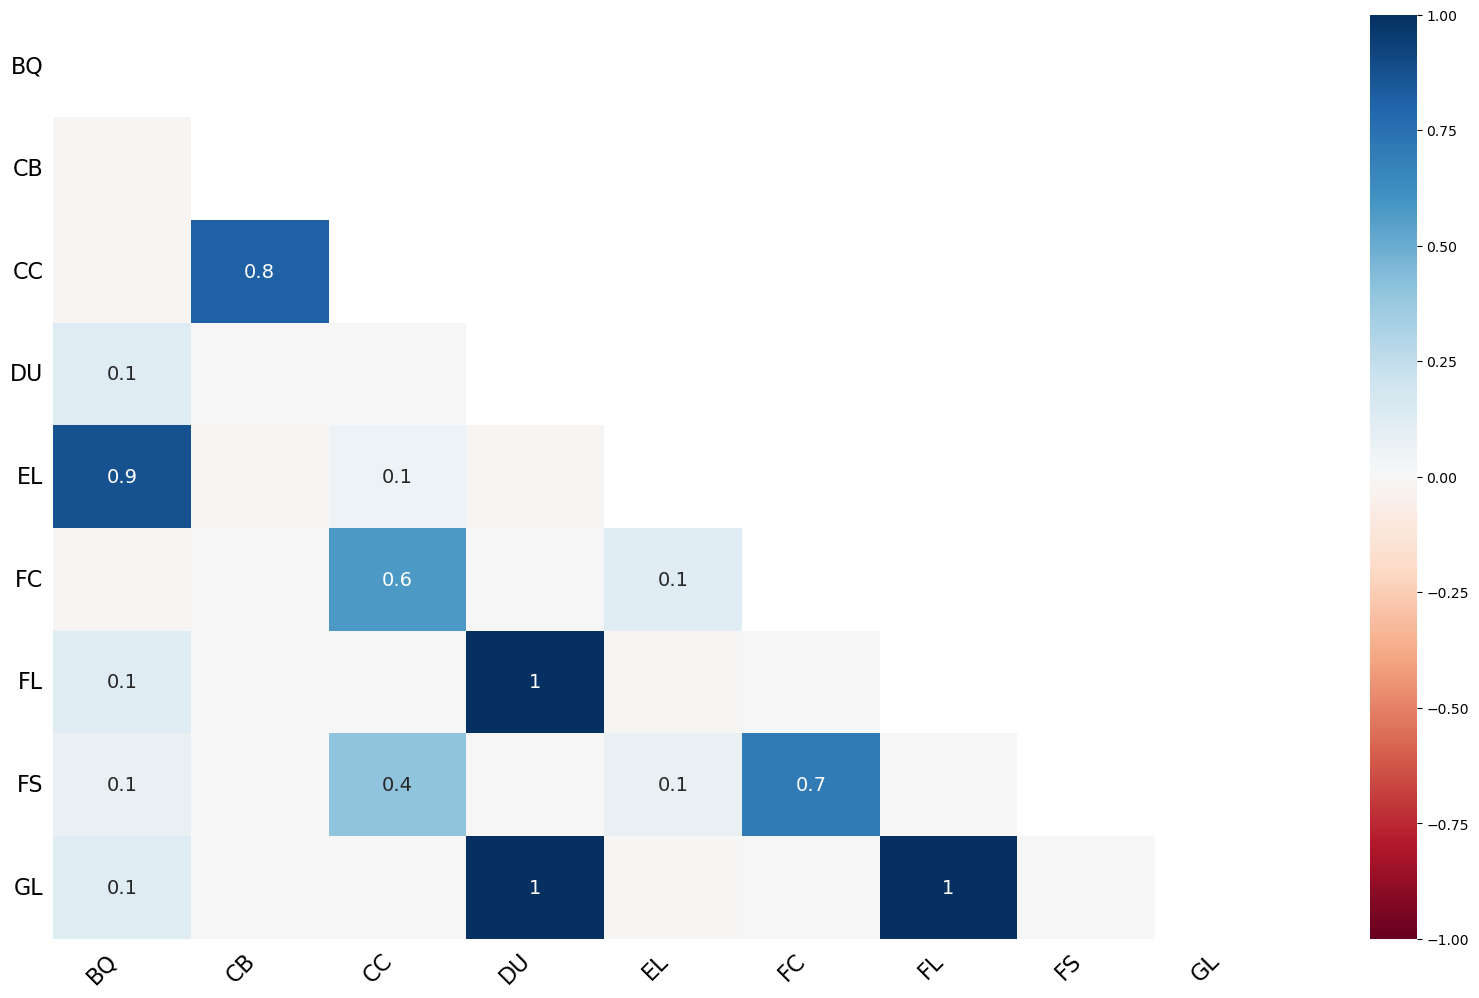

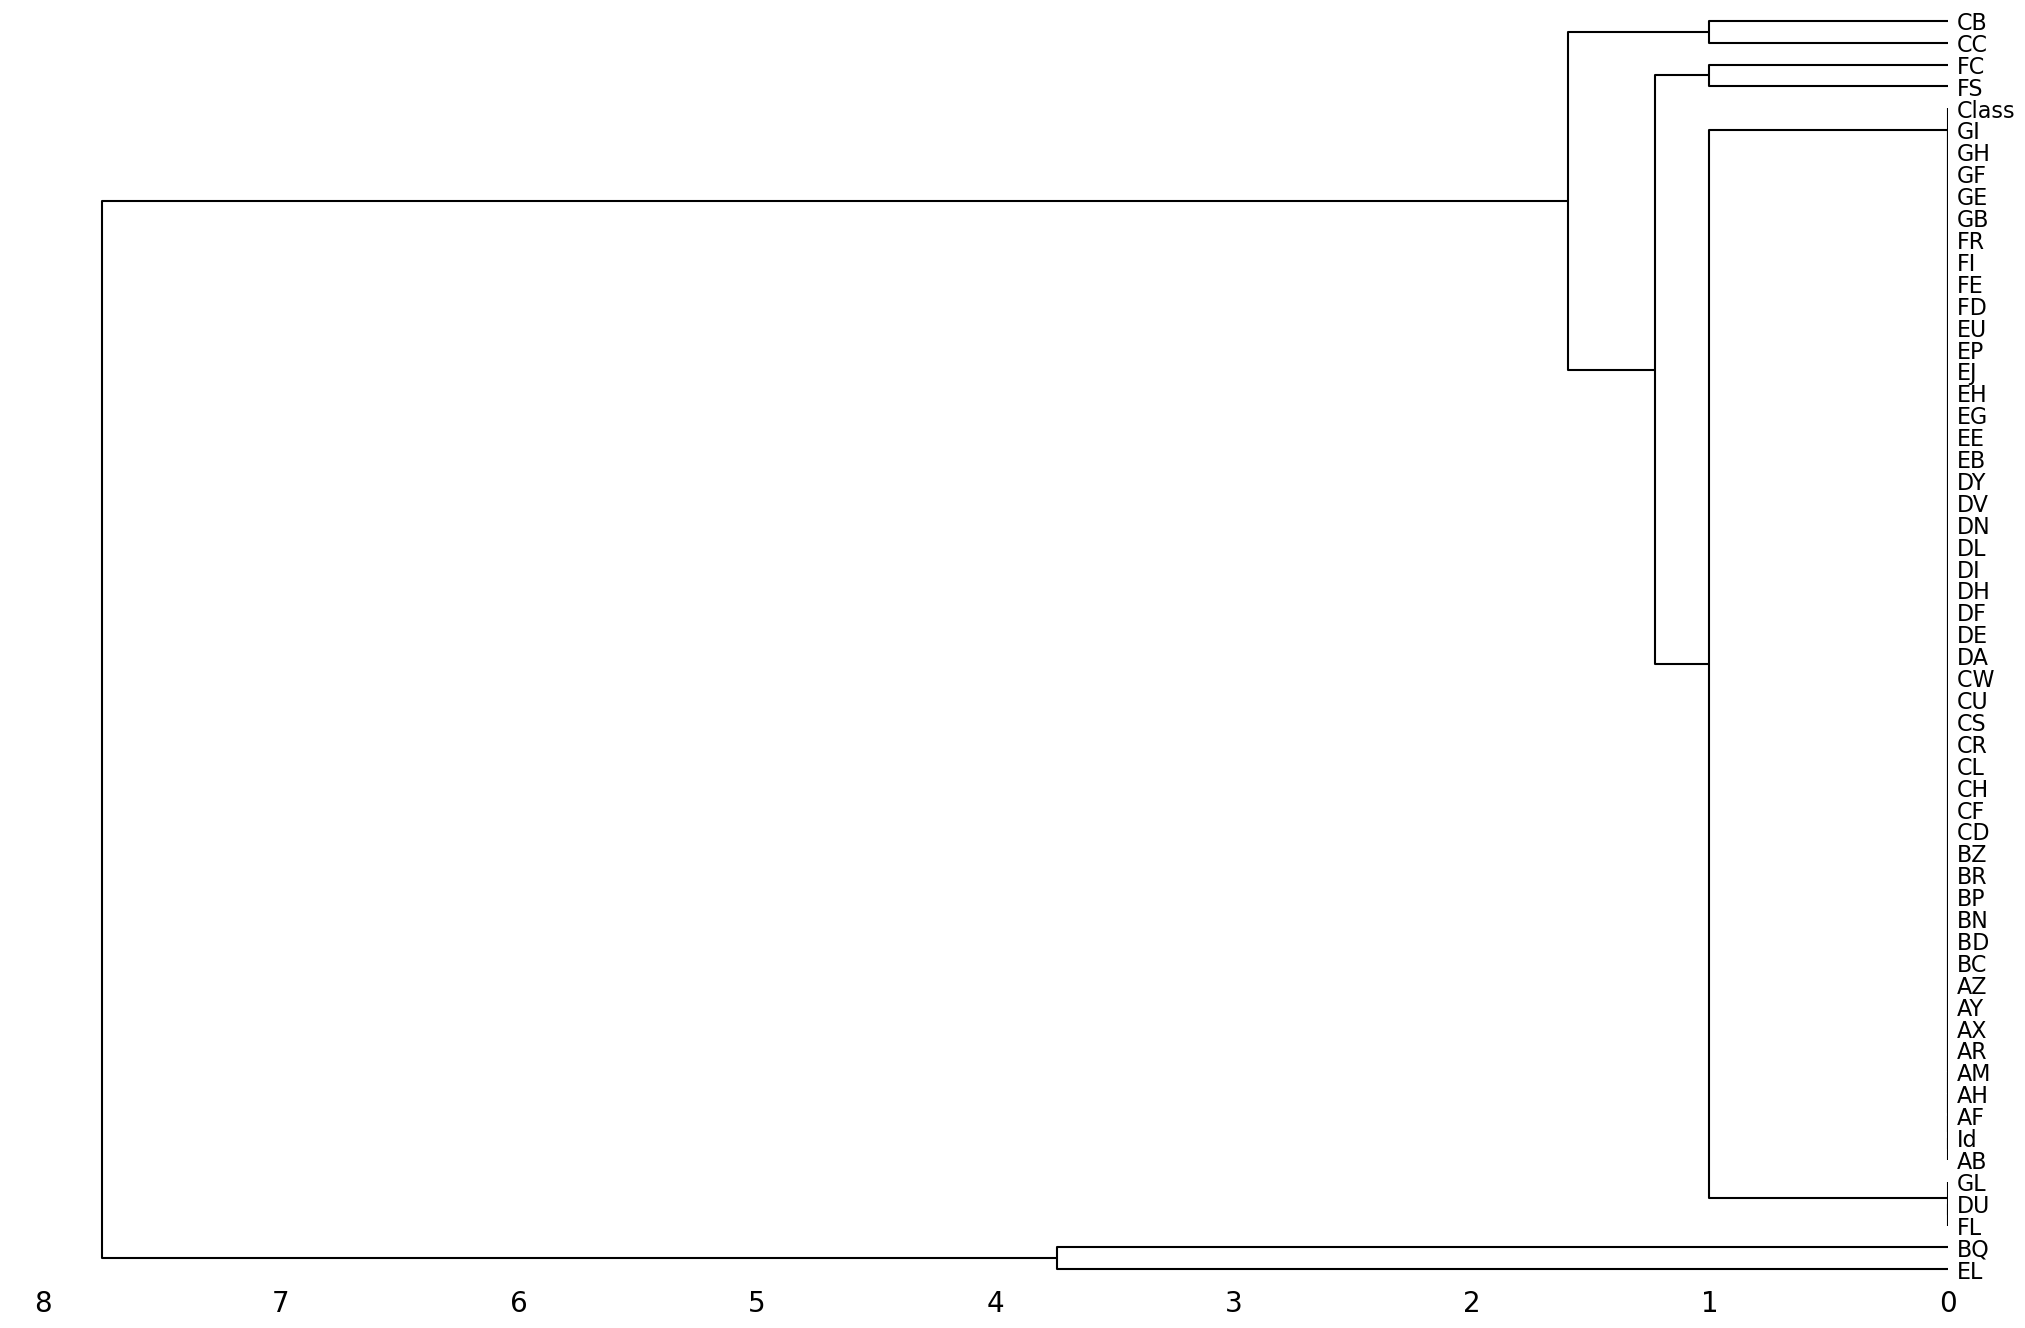

In [9]:
import missingno as msno
msno.heatmap(dataset)
msno.dendrogram(dataset)

num_columns_with_missing = dataset.columns[dataset.isnull().any()==True].tolist()

In [10]:
# Explore rows with missing values
rows_with_missing_values = dataset[dataset.isnull().any(axis=1)]
html_rows_with_missing_values = create_scrollable_table(rows_with_missing_values, 
                                                        'rows_with_missing_values', 'Rows with missing values')
display(HTML(html_rows_with_missing_values))

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
8,0594b00fb30a,0.346113,3238.43674,85.200147,28.888816,8.138688,4.021986,0.025578,8.243016,3.626448,6569.370010,20.4798,135.881145,NaN,601.802912,257.432377,116.100712,0.855496,93.225352,14.566390,0.033830,1.050225,1.050375,29.914973,1.473039,43.015704,76.77356,231.134460,0.238680,0.330693,131.349555,98.16872,29.466032,0.613833,1.74307,7.200676,10.771632,1.342323,3004.926575,0.066924,B,NaN,78.526968,56.610456,35.300160,1.389258,3380.026318,11.450501,4.762291,1.18262,0.067730,17.245908,147.218610,4589.611956,29.771721,54.675576,0.073416,0
15,07760b4cf3f8,0.666588,3657.78160,304.283751,75.418144,8.138688,12.818973,0.025578,8.167392,1.229900,3597.873030,17.6550,227.744514,NaN,842.371642,257.432377,20.578649,0.651609,373.115464,6.925878,0.051342,1.050225,0.768900,13.784111,1.953018,7.030640,24.32760,647.221725,0.238680,0.333426,117.818145,75.31724,15.927216,0.268983,1.74307,6.446020,4.926396,3.115963,185.594100,0.006084,B,NaN,78.526968,41.357688,41.566224,2.719146,4143.635748,7.723713,67.872762,0.77720,0.582478,4.102182,72.611063,2218.449060,23.806958,35.843392,0.015231,0
18,0b2cc0b0e6c5,0.269199,1586.67784,85.200147,14.459893,8.138688,4.907886,0.032886,7.007824,3.521028,7125.170390,19.7736,176.541633,NaN,700.704062,257.432377,23.317567,0.574937,67.094664,35.649643,0.033432,1.050225,0.621375,33.660011,1.903365,36.658872,57.58308,176.650485,0.238680,0.475542,129.756960,85.36710,21.386416,0.372438,1.74307,17.932064,6.241044,3.970535,1389.371025,0.006084,B,NaN,102.487333,36.673488,32.329920,3.312846,4170.630264,13.727370,97.303580,2.73702,0.711165,16.362218,72.611063,3597.877440,31.330820,25.444796,0.011000,0
23,0cf6c827b8bb,0.371751,2354.54142,105.030540,5.150311,8.138688,10.409325,0.025578,11.526358,2.754976,5435.445190,19.7736,114.529302,NaN,220.658446,257.432377,134.694105,0.780432,56.891328,6.659790,0.023880,1.050225,0.571237,33.109065,1.125468,42.228736,30.65394,149.521590,0.238680,0.409950,96.227752,95.75828,21.270408,0.600039,1.74307,27.686442,4.926396,6.735801,8012.394450,0.121680,B,NaN,78.526968,21.775200,35.808528,2.493540,5709.501083,8.481751,4.648113,0.49706,0.866944,21.664358,198.469061,5987.708568,32.610844,15.019194,0.136552,0
24,0d1b855c7635,0.158101,3257.64549,138.368592,8.640630,18.385464,4.146012,0.182700,4.099451,7.836220,3633.584335,22.2453,170.308184,30.010903,355.723543,2568.243295,NaN,NaN,49.688740,11.840134,0.026069,1.050225,0.731025,57.192031,1.299254,36.817848,42.31334,356.052887,0.901017,0.379887,137.799000,77.89940,15.988632,0.005518,1.74307,23.394336,15.429444,1.130696,559.246525,0.003042,A,87.303431,304.176138,47.280036,117.815712,0.296850,13173.694370,10.358927,0.173229,1.82323,0.433472,8.311337,72.611063,1884.728169,48.039971,37.160256,21.978000,0
45,12d002d52230,1.491277,2434.32640,137.149332,124.242349,8.138688,4.730706,0.025578,4.487024,1.229900,2734.489610,20.4798,129.378519,NaN,2148.501967,257.432377,94.262896,0.715257,210.837232,10.924793,0.044974,1.196620,3.039675,22.717805,1.081332,39.496704,32.13804,556.277615,0.238680,0.308829,264.318060,102.47868,18.820592,0.151734,1.74307,39.264572,7.089204,5.865105,1000.589825,0.006084,B,NaN,102.199994,41.383008,17.867136,0.486834,6448.462858,4.917596,9.126892,2.44238,0.067730,30.919848,72.611063,819.350802,20.156657,31.537864,0.027000,0
46,1319c3883fff,0.243561,3316.81570,85.200147,13.406913,8.138688,3.809370,0.025578,10.505434,4.258968,3042.040690,18.3612,122.748723,NaN,366.787164,257.432377,38.234560,0.650385,85.471768,15.300792,0.018308,1.050225,0.895950,32.474431,1.130985,34.569920,51.10348,802.970055,0.238680,0.396285,129.113145,71.35708,29.186248,0.558657,1.74307,12.977388,4.926396,6.497972,1470.425350,0.042588,B,NaN,78.526968,3.828384,18.901008,3.449397,6946.192026,9.162606,17.726310,0.99586,0.291239,14.585536,160.164837,6209.544726,36.942088,33.093924,0.051333,0
48,135f1

One should note that only feature "BQ" and "EL" have a big proportion of data missing. For a small proportion of data missing, one can omit them.

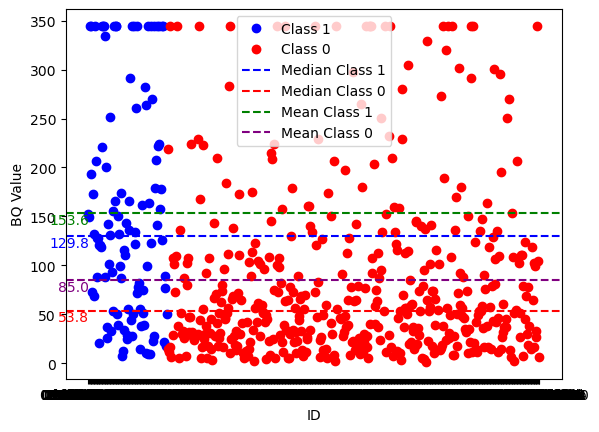

In [11]:
id_num = dataset['Id']
bq = dataset['BQ']
cla = dataset['Class']

cla_1_x = [x for x, c in zip(id_num, cla) if c == 1]
cla_1_y = [y for y, c in zip(bq, cla) if c == 1]
cla_0_x = [x for x, c in zip(id_num, cla) if c == 0]
cla_0_y = [y for y, c in zip(bq, cla) if c == 0]

plt.plot(cla_1_x, cla_1_y, 'bo', label = 'Class 1')
plt.plot(cla_0_x, cla_0_y, 'ro', label = 'Class 0')

# Add median lines
median_class_1 = dataset.loc[dataset['Class'] == 1, 'BQ'].median()
median_class_0 = dataset.loc[dataset['Class'] == 0, 'BQ'].median()
plt.axhline(median_class_1, color='blue', linestyle='--', label='Median Class 1')
plt.axhline(median_class_0, color='red', linestyle='--', label='Median Class 0')

# Add mean lines
mean_class_1 = dataset.loc[dataset['Class'] == 1, 'BQ'].mean()
mean_class_0 = dataset.loc[dataset['Class'] == 0, 'BQ'].mean()
plt.axhline(mean_class_1, color='green', linestyle='--', label='Mean Class 1')
plt.axhline(mean_class_0, color='purple', linestyle='--', label='Mean Class 0')

# Add text labels
plt.text(0.95, mean_class_1, f'{mean_class_1:.1f}', color='green', ha='right', va='top')
plt.text(0.95, mean_class_0, f'{mean_class_0:.1f}', color='purple', ha='right', va='top')
plt.text(0.95, median_class_1, f'{median_class_1:.1f}', color='blue', ha='right', va='top')
plt.text(0.95, median_class_0, f'{median_class_0:.1f}', color='red', ha='right', va='top')

plt.xlabel("ID")
plt.ylabel('BQ Value')
plt.legend()
plt.show()

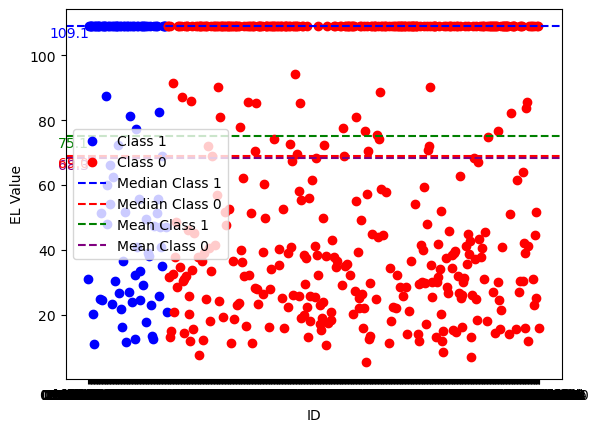

In [12]:
id_num = dataset['Id']
el = dataset['EL']
cla = dataset['Class']

cla_1_x = [x for x, c in zip(id_num, cla) if c == 1]
cla_1_y = [y for y, c in zip(el, cla) if c == 1]
cla_0_x = [x for x, c in zip(id_num, cla) if c == 0]
cla_0_y = [y for y, c in zip(el, cla) if c == 0]

plt.plot(cla_1_x, cla_1_y, 'bo', label = 'Class 1')
plt.plot(cla_0_x, cla_0_y, 'ro', label = 'Class 0')

# Add median lines
median_class_1 = dataset.loc[dataset['Class'] == 1, 'EL'].median()
median_class_0 = dataset.loc[dataset['Class'] == 0, 'EL'].median()
plt.axhline(median_class_1, color='blue', linestyle='--', label='Median Class 1')
plt.axhline(median_class_0, color='red', linestyle='--', label='Median Class 0')

# Add mean lines
mean_class_1 = dataset.loc[dataset['Class'] == 1, 'EL'].mean()
mean_class_0 = dataset.loc[dataset['Class'] == 0, 'EL'].mean()
plt.axhline(mean_class_1, color='green', linestyle='--', label='Mean Class 1')
plt.axhline(mean_class_0, color='purple', linestyle='--', label='Mean Class 0')

# Add text labels
plt.text(0.95, mean_class_1, f'{mean_class_1:.1f}', color='green', ha='right', va='top')
plt.text(0.95, mean_class_0, f'{mean_class_0:.1f}', color='purple', ha='right', va='top')
plt.text(0.95, median_class_1, f'{median_class_1:.1f}', color='blue', ha='right', va='top')
plt.text(0.95, median_class_0, f'{median_class_0:.1f}', color='red', ha='right', va='top')

plt.xlabel("ID")
plt.ylabel('EL Value')
plt.legend()
plt.show()

Another idea for imputing the missing data is to use linear regression, where the BQ value (or EL value) is the dependent variable, and other fifteen features with no missing data that are highly correlated with BQ (or EL) are selected as the independent variables.

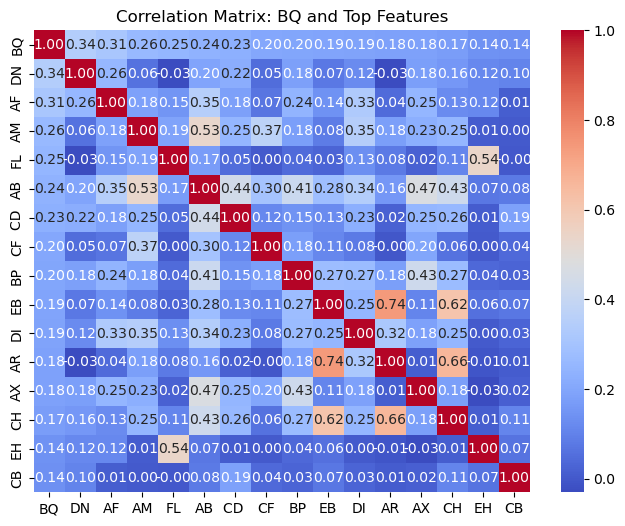

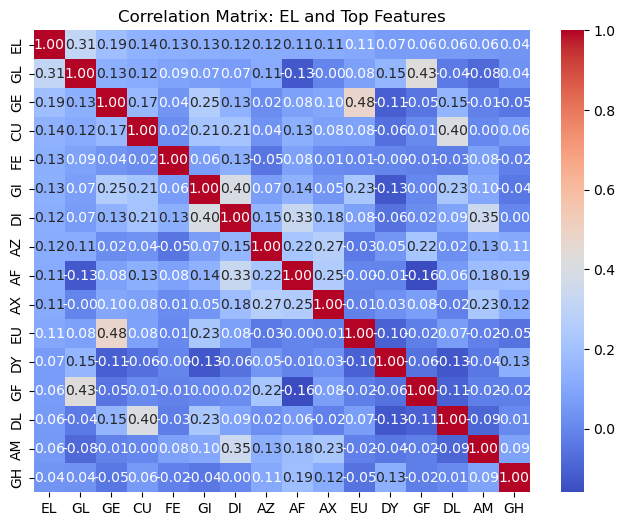

In [13]:
# BQ
# Compute the correlation matrix 
correlation_matrix = num_features.corr()
# Sort the correlation values for the "BQ" feature in descending order
bq_correlations = correlation_matrix['BQ'].sort_values(ascending=False)
# Select the two features with the highest correlation with "BQ"
top_features = bq_correlations[0:16].index  # Select the top fifteen features (including "BQ")
# Create a new correlation matrix 
selected_corr_matrix = correlation_matrix.loc[top_features, top_features]
# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: BQ and Top Features')
plt.show()

# EL
# Compute the correlation matrix 
correlation_matrix = num_features.corr()
# Sort the correlation values for the "EL" feature in descending order
el_correlations = correlation_matrix['EL'].sort_values(ascending=False)
# Select the two features with the highest correlation with "EL"
top_features = el_correlations[0:16].index  # Select the top fifteen features (including "EL")
# Create a new correlation matrix 
selected_corr_matrix = correlation_matrix.loc[top_features, top_features]
# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: EL and Top Features')
plt.show()

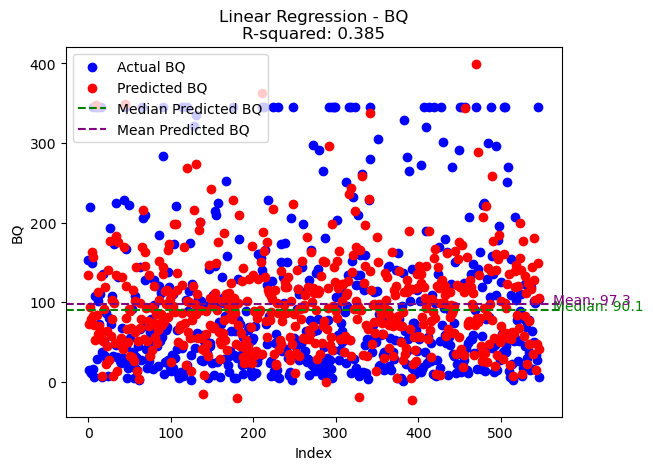

In [14]:
# Linear Regression - Missing Data Imputation - Here we decide to include top 60 highly correlated features, instead of 15
from sklearn.linear_model import LinearRegression

# Compute the correlation matrix
correlation_matrix = num_features.corr()

# BQ
# Sort the correlation values for the "BQ" feature in descending order
bq_correlations = correlation_matrix['BQ'].sort_values(ascending=False)

# Select the top 60 features with the highest correlation with "BQ"
top_features = bq_correlations[1:61].index  # Exclude "BQ" itself

# Filter the dataset with the top features
filtered_dataset_bq = dataset.copy().dropna(subset=['BQ'] + list(top_features), how='any')

# Train the linear regression model
missing_model_bq = LinearRegression()
missing_model_bq.fit(X=filtered_dataset_bq[list(top_features)], y=filtered_dataset_bq['BQ'])
intercept_bq = missing_model_bq.intercept_
coefficients_bq = missing_model_bq.coef_
pred_bq = missing_model_bq.predict(X=filtered_dataset_bq[list(top_features)])

# Compute the median and mean of the predicted values for BQ
median_pred_bq = np.median(pred_bq)
mean_pred_bq = np.mean(pred_bq)

# Compute the R-squared score
r2_bq = missing_model_bq.score(X=filtered_dataset_bq[list(top_features)], y=filtered_dataset_bq['BQ'])

# Compute the absolute error
error_bq = abs(filtered_dataset_bq['BQ'] - pred_bq)

# Plot the actual BQ, predicted BQ, and error bars
plt.scatter(range(len(filtered_dataset_bq)), filtered_dataset_bq['BQ'], color='blue', label='Actual BQ')
plt.scatter(range(len(filtered_dataset_bq)), pred_bq, color='red', label='Predicted BQ')
# plt.vlines(range(len(filtered_dataset_bq)), filtered_dataset_bq['BQ'], pred_bq, colors='red', linestyles='dashed', label='Error')
plt.axhline(median_pred_bq, color='green', linestyle='--', label='Median Predicted BQ')
plt.axhline(mean_pred_bq, color='purple', linestyle='--', label='Mean Predicted BQ')
# Display the median and mean values as text on the plot
plt.text(len(filtered_dataset_bq) + 15, median_pred_bq, f'Median: {median_pred_bq:.1f}', color='green')
plt.text(len(filtered_dataset_bq) + 15, mean_pred_bq, f'Mean: {mean_pred_bq:.1f}', color='purple')

plt.xlabel('Index')
plt.ylabel('BQ')
plt.legend()
plt.title(f'Linear Regression - BQ\nR-squared: {r2_bq:.3f}')
plt.show()

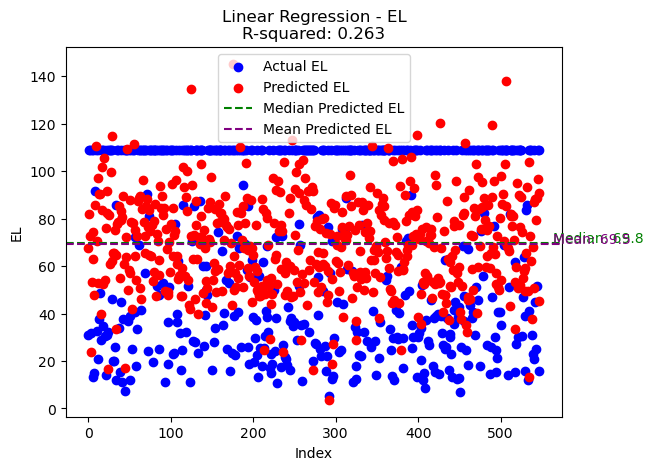

In [15]:
# EL
# Sort the correlation values for the "EL" feature in descending order
el_correlations = correlation_matrix['EL'].sort_values(ascending=False)

# Select the top 60 features with the highest correlation with "EL"
top_features = el_correlations[1:61].index  # Exclude "EL" itself

# Filter the dataset with the top features
filtered_dataset_el = dataset.copy().dropna(subset=['EL'] + list(top_features), how='any')

# Train the linear regression model
missing_model_el = LinearRegression()
missing_model_el.fit(X=filtered_dataset_el[list(top_features)], y=filtered_dataset_el['EL'])
intercept_el = missing_model_el.intercept_
coefficients_el = missing_model_el.coef_
pred_el = missing_model_el.predict(X=filtered_dataset_el[list(top_features)])

# Compute the median and mean of the predicted values for BQ
median_pred_el = np.median(pred_el)
mean_pred_el = np.mean(pred_el)

# Compute the R-squared score
r2_el = missing_model_el.score(X=filtered_dataset_el[list(top_features)], y=filtered_dataset_el['EL'])

# Compute the absolute error
error_el = abs(filtered_dataset_el['EL'] - pred_el)

# Plot the actual EL, predicted EL, and error bars
plt.scatter(range(len(filtered_dataset_el)), filtered_dataset_el['EL'], color='blue', label='Actual EL')
plt.scatter(range(len(filtered_dataset_el)), pred_el, color='red', label='Predicted EL')
# plt.vlines(range(len(filtered_dataset_el)), filtered_dataset_el['EL'], pred_el, colors='red', linestyles='dashed', label='Error')
plt.axhline(median_pred_el, color='green', linestyle='--', label='Median Predicted EL')
plt.axhline(mean_pred_el, color='purple', linestyle='--', label='Mean Predicted EL')
# Display the median and mean values as text on the plot
plt.text(len(filtered_dataset_el) + 15, median_pred_el, f'Median: {median_pred_el:.1f}', color='green')
plt.text(len(filtered_dataset_el) + 15, mean_pred_el, f'Mean: {mean_pred_el:.1f}', color='purple')

plt.xlabel('Index')
plt.ylabel('EL')
plt.legend()
plt.title(f'Linear Regression - EL\nR-squared: {r2_el:.3f}')
plt.show()

### Bar Plot for the label column: Class

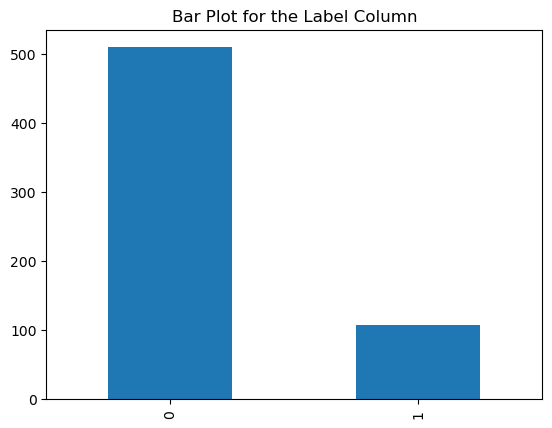

In [16]:
# To see it is balanced or not
dataset['Class'].value_counts().plot(kind='bar')
plt.title('Bar Plot for the Label Column')
plt.show()


#### Note for handling imbalanced dataset in ML

background: getting more data for the minority class may be impractical or hard to acquire because the data is *inherently imbalanced*, For example, detection of fraud and detection of rare disease.

problem: the model cannot learn to predict the minority class well because of it. To be more specific, an accuracy of over 90% can be misleading because the model may not have predictive power on the minority class since more than 90% of labels is in the dominate class

solutions: data-level, model-level and metric level

#### Data-level: Resampling

Description: Change the distribution of the training data to reduce the level of class imbalance

__Upsampling/Over-sampling: Add more examples to the minority class__
- Random Upsampling
    - Downside: Model Overfit
- Generate Synthetic Example
    - It does this using a nearest neighbors approach

__Downsampling/Under-sampling: remove some examples from the majority class__
- Random Downsampling
    - Downside: The resulting dataset may be too small for a model to learn from
- Tomek Links
    - Find pairs of examples from opposite class that are close in proximity and remove the sample of the majority class in each pair
    
#### Model-level:

Description: Make the model more robust and it does not change the distribution of the training data

__Class-balanced Loss__

__Appropriate Algorithms__
- Tree-based Models work well on tasks involving small and imbalanced dataset
- Logistic Regression is able to handle class imbalanced relatively well by adjusting the probability threshold to improve the accuracy for predicting the minority class

__Combine Many Techniques Together__
- Downsampling + emsembling
- Downsampling + class-balanced loss

#### Evaluation Metrics

Description: Some metrics for imbalanced data and one should remember that using un-sampled data instead of resampled data to evaluate the model to avoid overfit the resampled distribution.

- Using accuracy for each class individually

- Precision, recall and F1

- Precision-recall curve

- AUC of the ROC curve
    - it treats both classes equally, so it is less sensitive to model improvement on monority class

Ref: https://www.youtube.com/watch?v=GR-OW5asKlk

In [17]:
X = num_features
y = dataset['Class']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

Note: You can adjust the sampling_strategy parameter to different values depending on your specific needs and the nature of the dataset imbalance. For example, setting sampling_strategy=0.5 would aim to achieve a 1:2 balance, where the minority class has half the number of samples as the majority class.

Text(0.5, 1.0, 'Basic Oversampling')

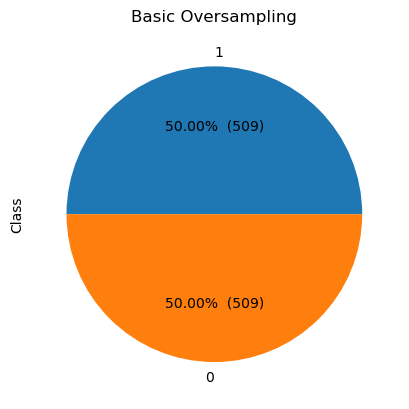

In [18]:
# Random Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 1)
X_res, y_res = ros.fit_resample(X, y)
value_counts = y_res.value_counts()
ax = value_counts.plot(kind='pie', autopct=make_autopct(value_counts))
ax.set_title("Basic Oversampling")

Text(0.5, 1.0, 'SMOTE')

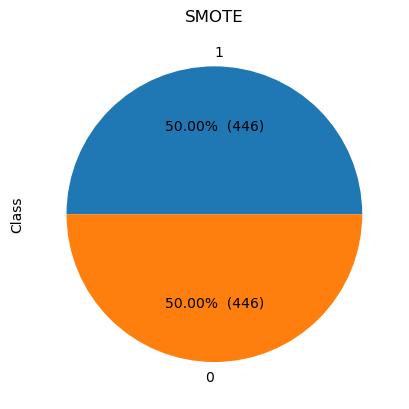

In [19]:
# SMOTE: Synthetic Minority Over-sampling Technique
# Note: SMOTE does not accept missing values encoded as NaN natively.

from imblearn.over_sampling import SMOTE

# Create a copy of 'num_features' and drop rows with NaN values
X = num_features.copy().dropna()

# Filter the 'Y' column to include only the corresponding rows in 'X'
Y = dataset.loc[X.index]['Class']

# Apply SMOTE oversampling technique
sm = SMOTE(random_state=12, k_neighbors=4)
X_res, y_res = sm.fit_resample(X, Y)

# Check the value counts of the oversampled labels
value_counts = y_res.value_counts()

# Plot a pie chart of the oversampled labels
ax = value_counts.plot(kind='pie', autopct=make_autopct(value_counts))
ax.set_title("SMOTE")

Text(0.5, 1.0, 'Basic Undersampling')

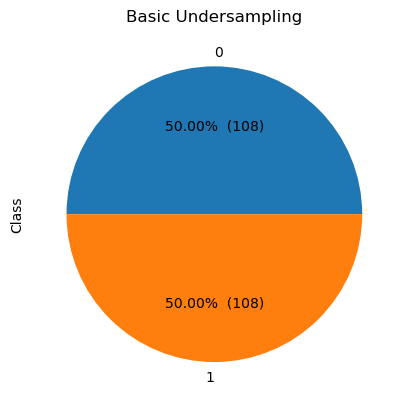

In [20]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 1)
X = num_features
y = dataset['Class']
X_res, y_res = rus.fit_resample(X, y)
value_counts = y_res.value_counts()
ax = value_counts.plot(kind='pie', autopct=make_autopct(value_counts))
ax.set_title("Basic Undersampling")

Text(0.5, 1.0, 'TomekLinks')

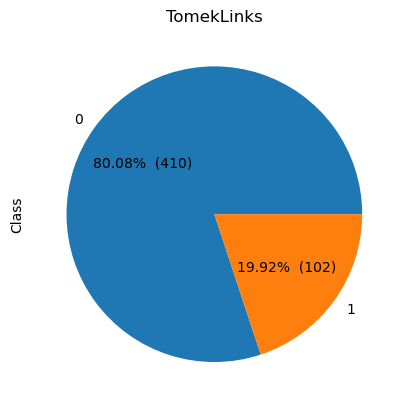

In [21]:
# TomekLinks
# Note: TomekLinks does not accept missing values encoded as NaN natively.
from imblearn.under_sampling import TomekLinks

# Create a copy of 'num_features' and drop rows with NaN values
X = num_features.copy().dropna()

# Filter the 'Y' column to include only the corresponding rows in 'X'
Y = dataset.loc[X.index]['Class']

# Apply TomekLinks undersampling technique
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, Y)

# Check the value counts of the undersampled labels
value_counts = y_res.value_counts()

# Plot a pie chart of the undersampled labels
ax = value_counts.plot(kind='pie', autopct=make_autopct(value_counts))
ax.set_title("TomekLinks")

TomekLinks technique does not guarantee that the number of samples in the minority class will be equal to the majority class after undersampling. TomekLinks is designed to remove specific instances from the majority class that are considered Tomek links, which are pairs of samples from different classes that are closest to each other. One can use a combination of TomekLinks and SMOTE (Synthetic Minority Over-sampling Technique) to undersample the majority class and oversample the minority class simultaneously.

Text(0.5, 1.0, 'SMOTETomek')

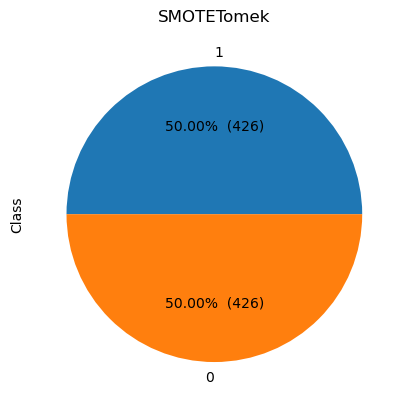

In [22]:
# SMOTETomek
from imblearn.combine import SMOTETomek

# Create a copy of 'num_features' and drop rows with NaN values
X = num_features.copy().dropna()

# Filter the 'Y' column to include only the corresponding rows in 'X'
Y = dataset.loc[X.index]['Class']

# Apply SMOTETomek technique
smt = SMOTETomek(random_state=12)
X_res, y_res = smt.fit_resample(X, Y)

# Check the value counts of the balanced classes
value_counts = y_res.value_counts()

# Plot a pie chart of the balanced classes
ax = value_counts.plot(kind='pie', autopct=make_autopct(value_counts))
ax.set_title("SMOTETomek")

### Distribution for all numeric features

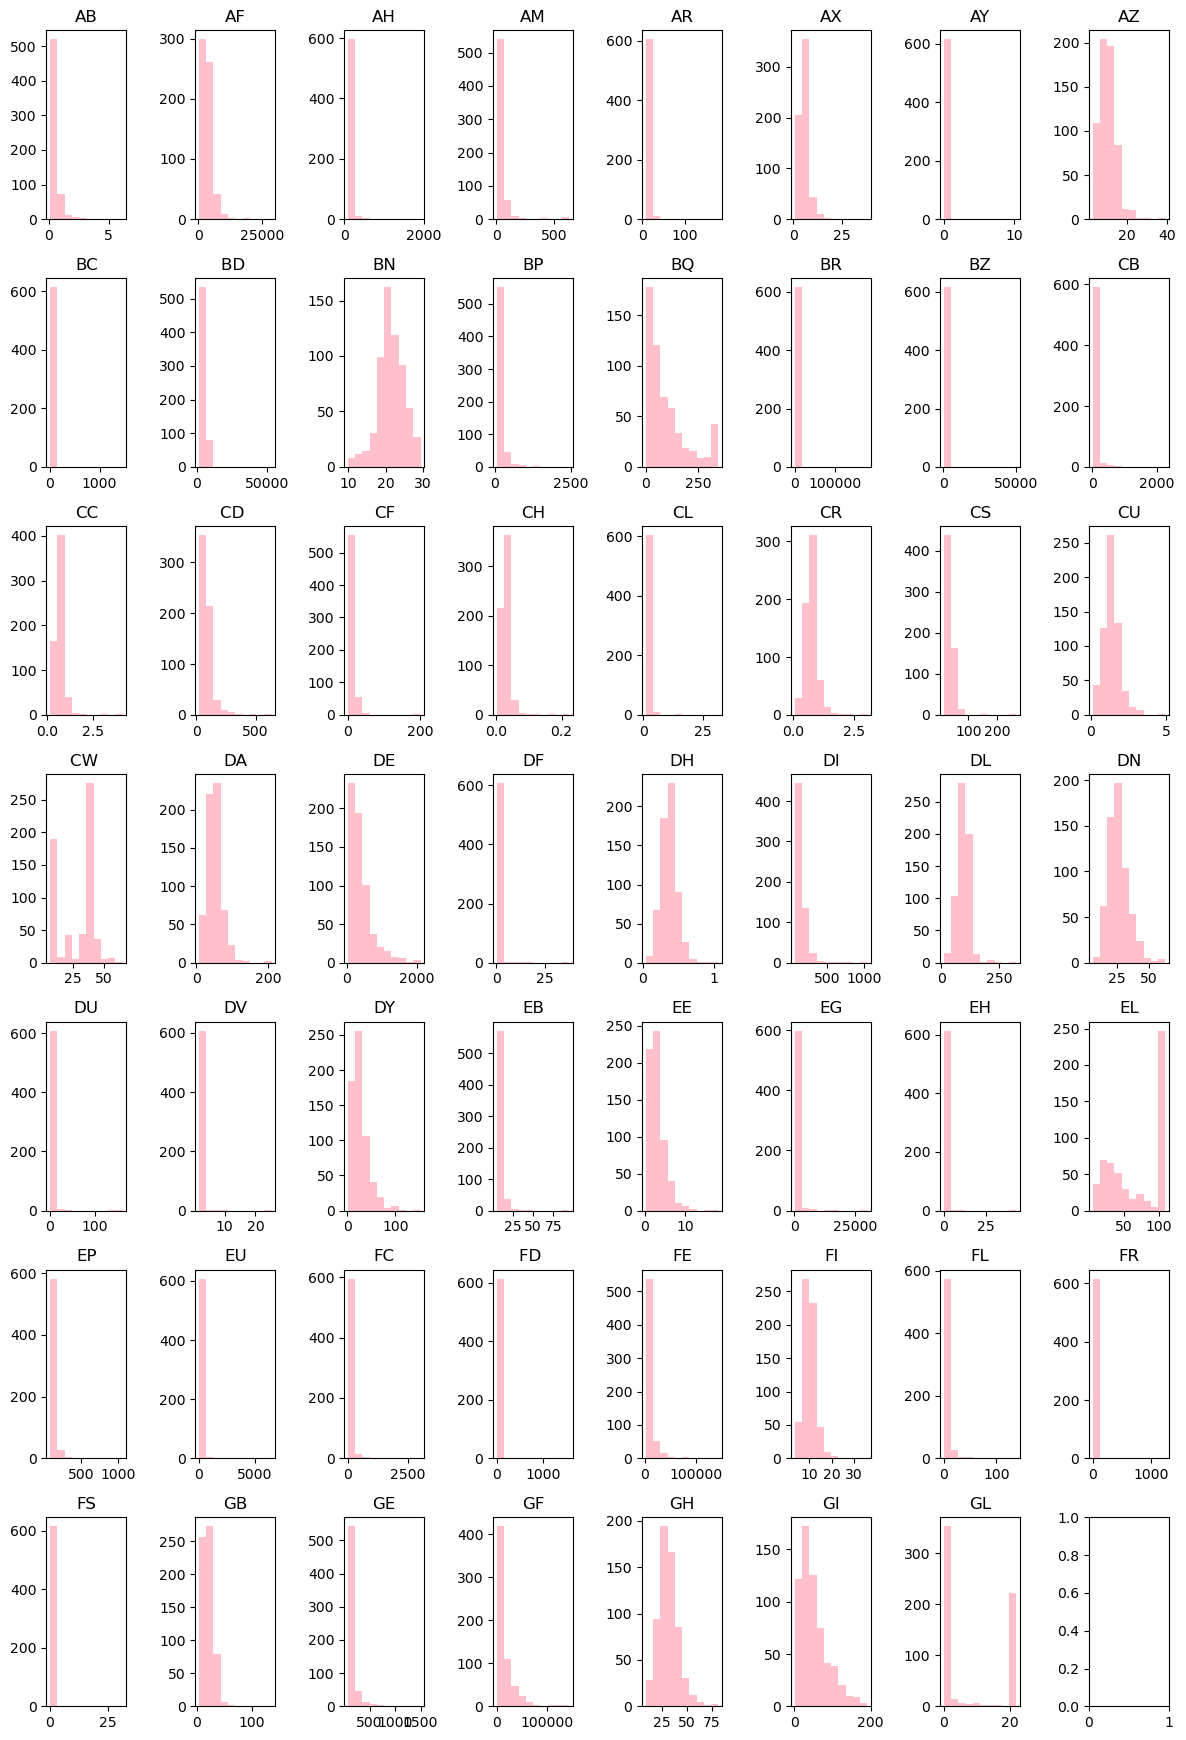

In [23]:
num_columns = num_features.columns

num_plots = len(num_columns)
num_rows = num_plots // 8 + (num_plots % 8 > 0)

fig, axes = plt.subplots(num_rows, 8, figsize=(12, 2.5 * num_rows))
for i, column in enumerate(num_columns):
    ax = axes[i // 8, i % 8]
    ax.hist(num_features[column], color='pink')
    ax.set_title(column)

plt.tight_layout()
plt.show()

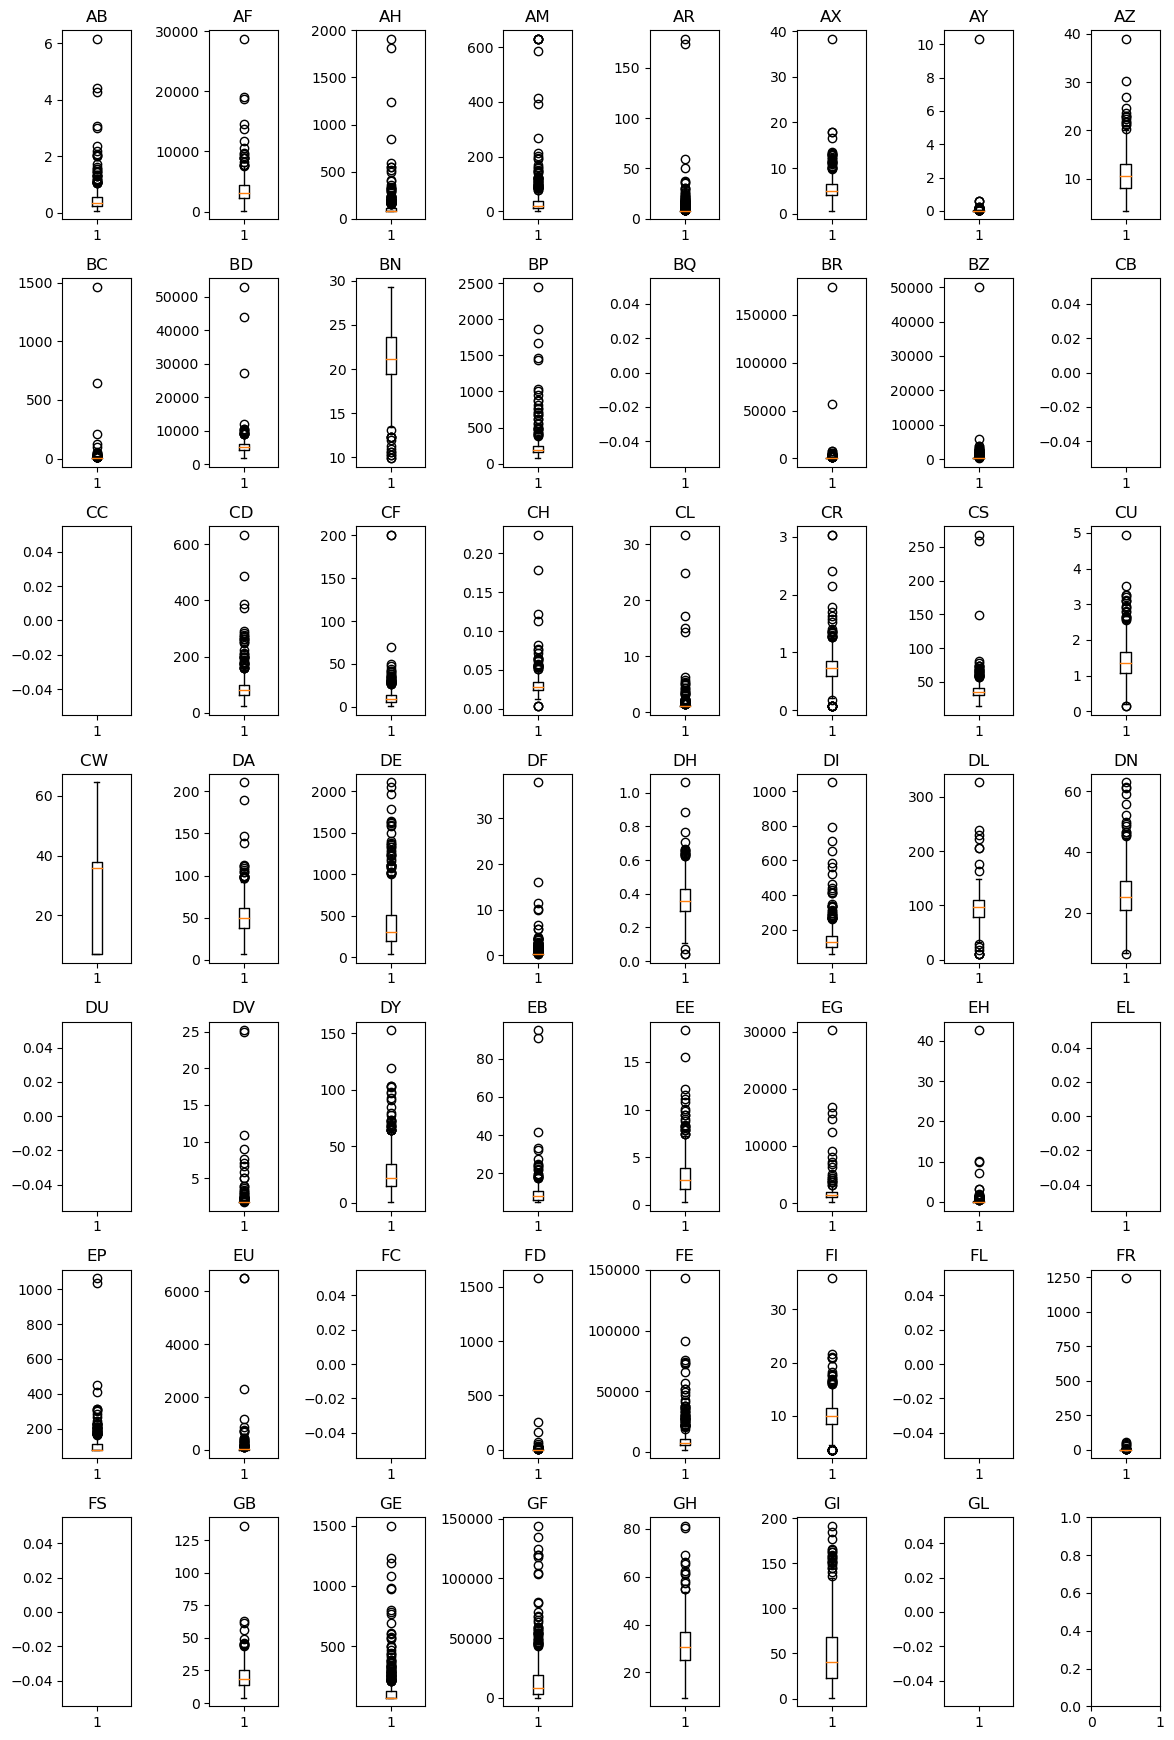

In [24]:
num_columns = num_features.columns

num_plots = len(num_columns)
num_rows = num_plots // 8 + (num_plots % 8 > 0)

fig, axes = plt.subplots(num_rows, 8, figsize=(12, 2.5 * num_rows))
for i, column in enumerate(num_columns):
    ax = axes[i // 8, i % 8]
    ax.boxplot(num_features[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [25]:
num_skewness = num_features.skew().to_frame()
stats = num_skewness
html_num = create_scrollable_table(stats, "Skewness", "Summary Statistics of Numerical Features")
display(HTML(html_num))

,0
AB,5.927245
AF,3.751057
AH,10.094184
AM,6.434969
AR,13.259275
AX,4.400920
AY,24.270320
AZ,0.799989
BC,19.726787
BD,10.455121


In [26]:
extreme_right_skewed_columns = num_features.columns[num_features.skew() > 1.5]
print(extreme_right_skewed_columns)

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'BC', 'BD ', 'BP', 'BR', 'BZ',
       'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'DA', 'DE', 'DF', 'DI',
       'DU', 'DV', 'DY', 'EB', 'EE', 'EG', 'EH', 'EP', 'EU', 'FC', 'FD ', 'FE',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF'],
      dtype='object')


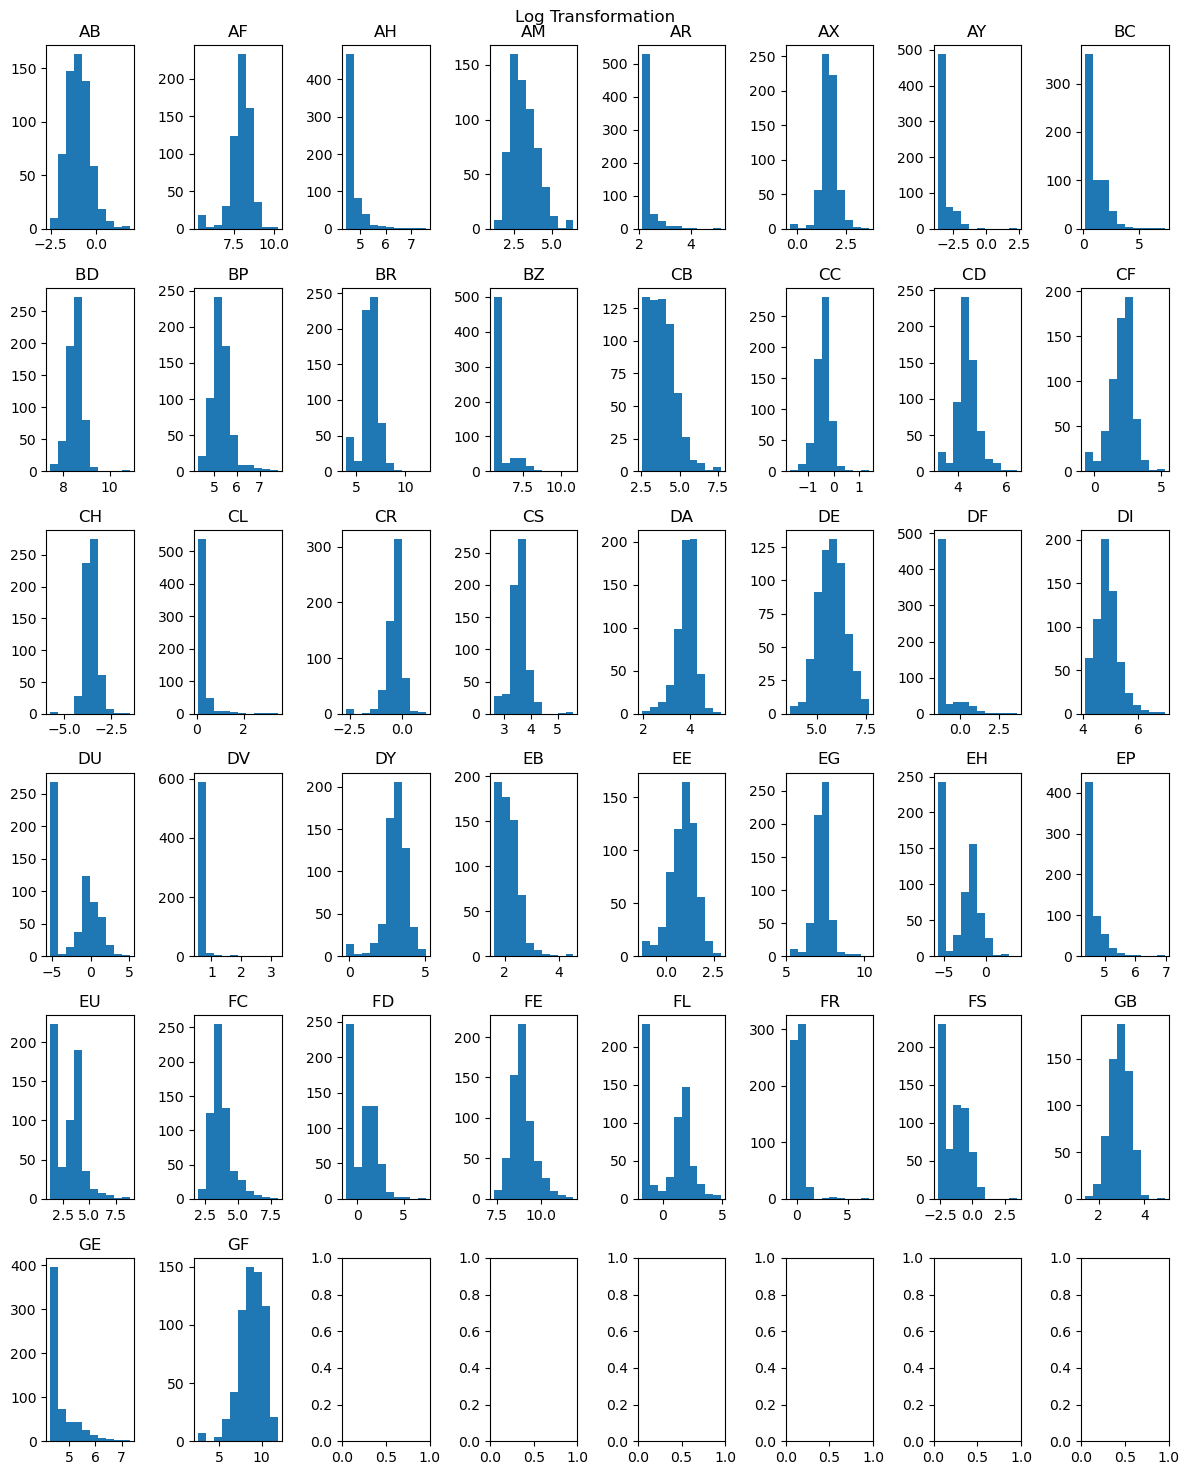

In [27]:
num_plots = len(extreme_right_skewed_columns)
num_rows = num_plots // 8 + (num_plots % 8 > 0)

fig, axes = plt.subplots(num_rows, 8, figsize=(12, 2.5 * num_rows))
for i, column in enumerate(extreme_right_skewed_columns):
    ax = axes[i // 8, i % 8]
    ax.hist(np.log(num_features[column]))
    ax.set_title(column)
    
fig.suptitle("Log Transformation")
plt.tight_layout()
plt.show()

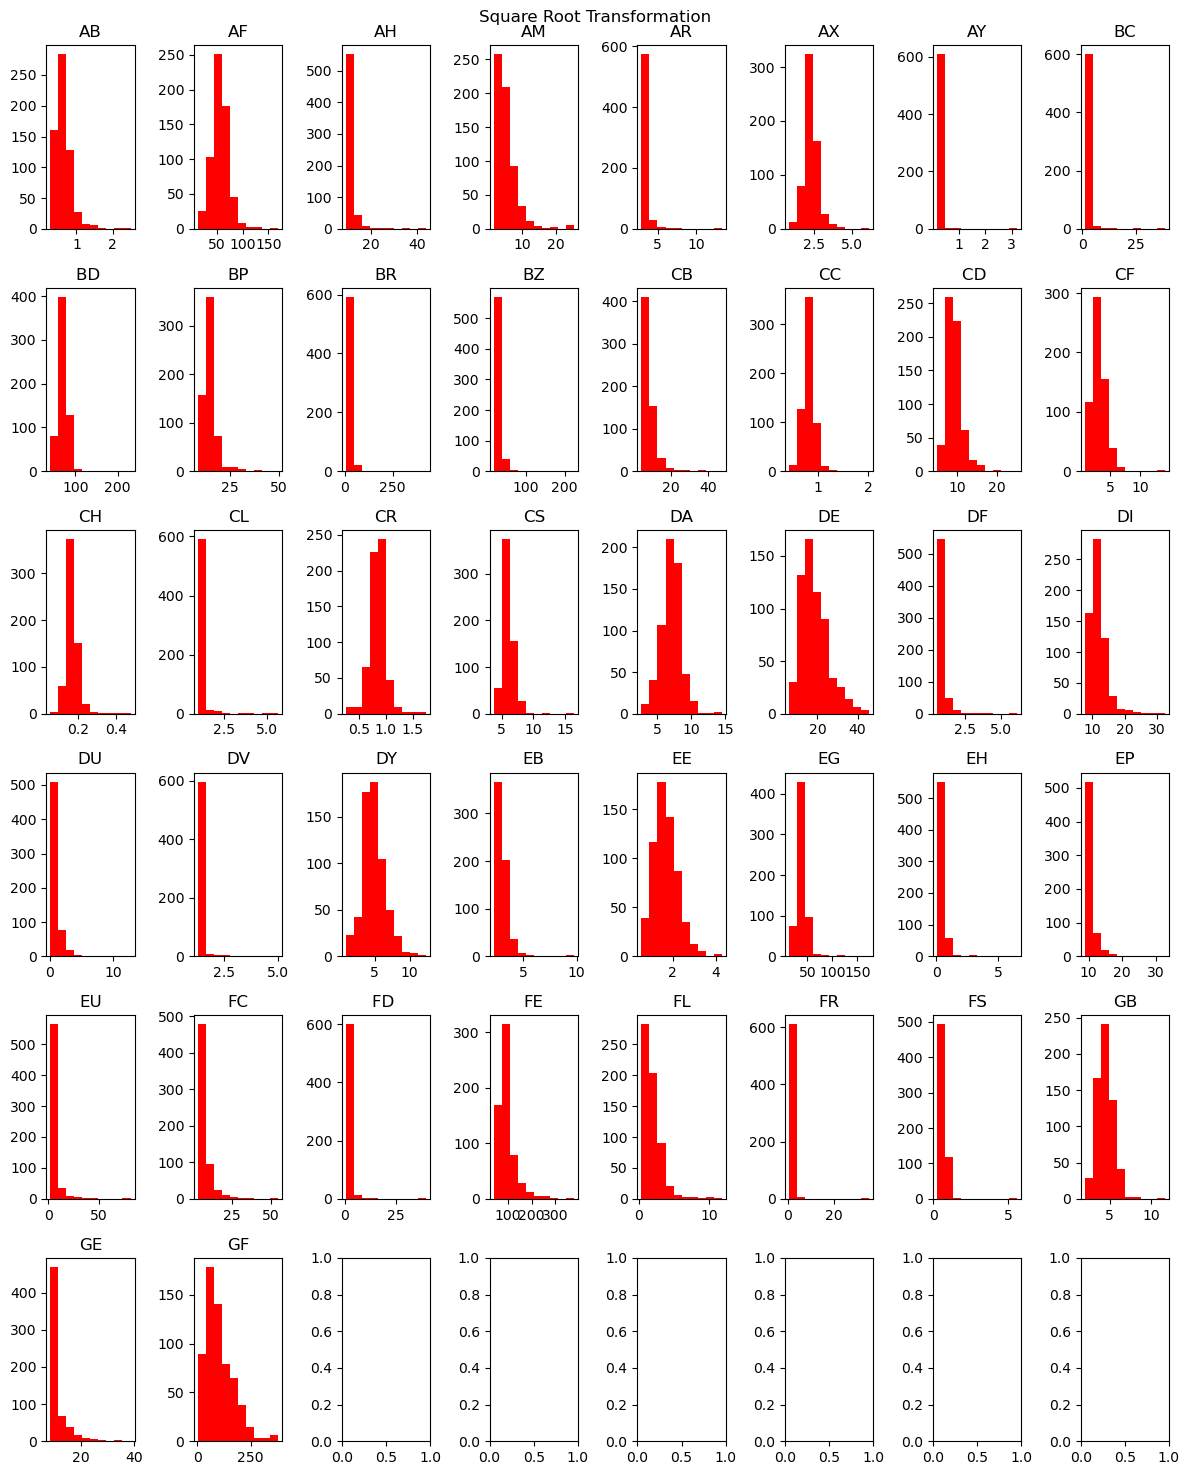

In [28]:
num_plots = len(extreme_right_skewed_columns)
num_rows = num_plots // 8 + (num_plots % 8 > 0)

fig, axes = plt.subplots(num_rows, 8, figsize=(12, 2.5 * num_rows))
for i, column in enumerate(extreme_right_skewed_columns):
    ax = axes[i // 8, i % 8]
    ax.hist(np.sqrt(num_features[column]), color='red')
    ax.set_title(column)
    
fig.suptitle("Square Root Transformation")
plt.tight_layout()
plt.show()

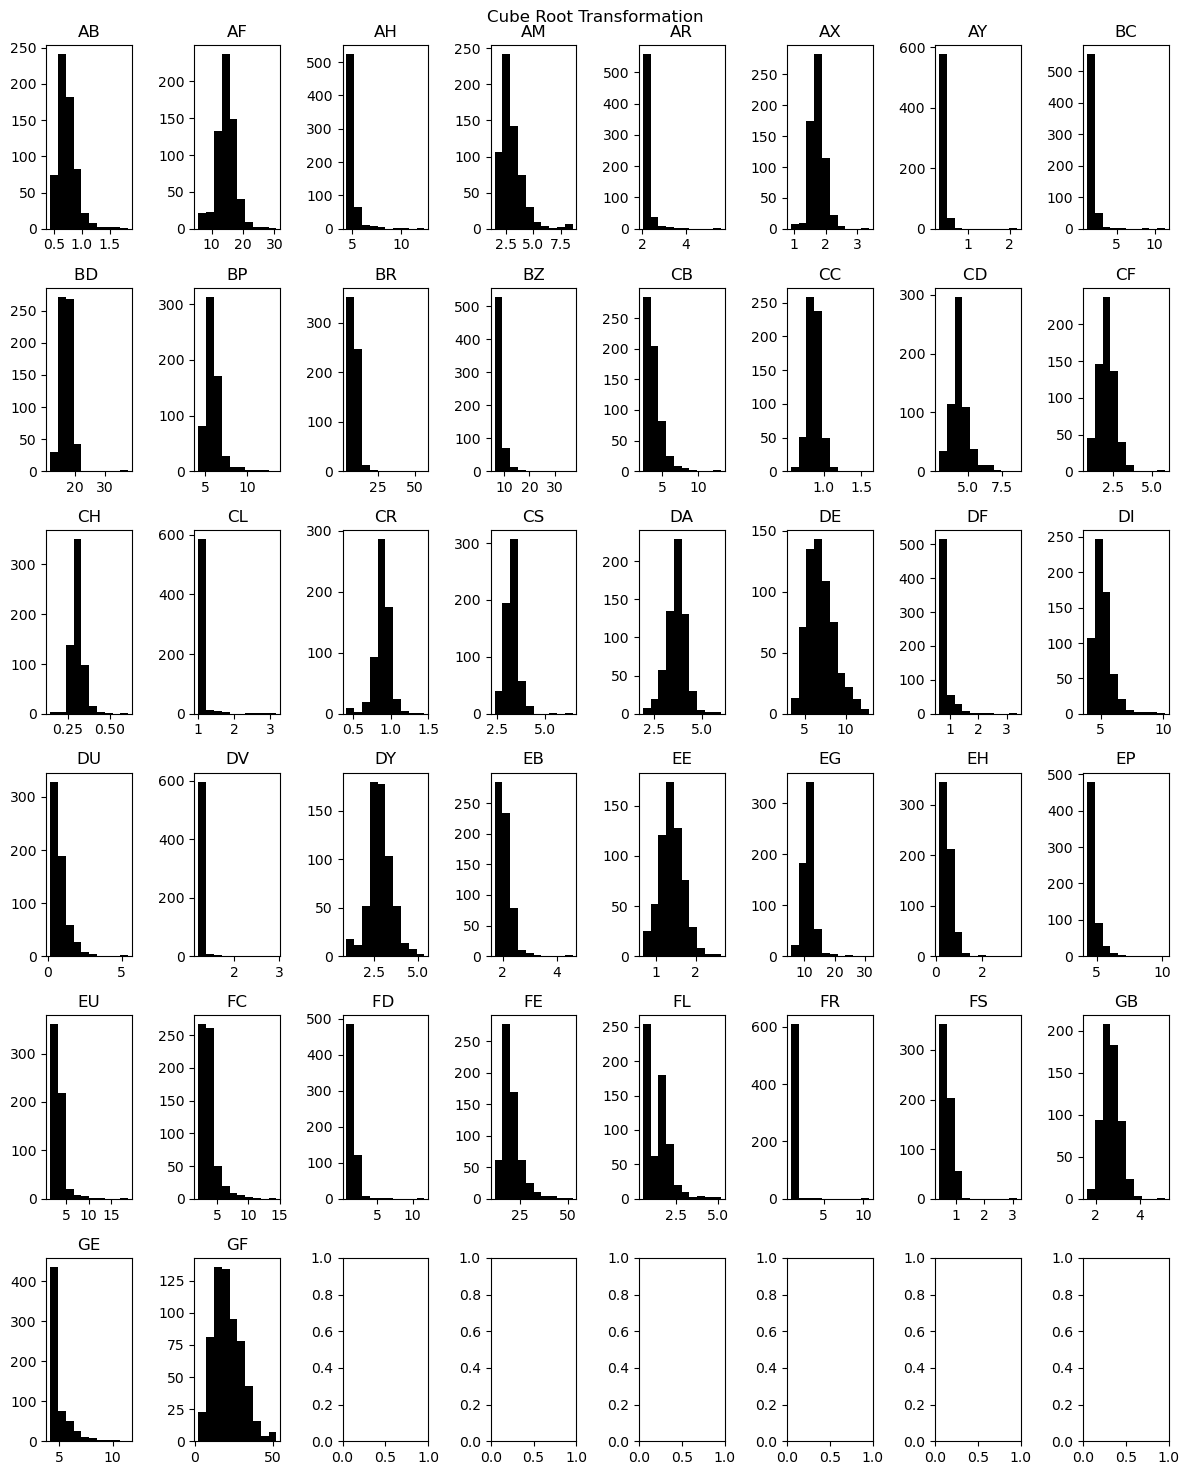

In [29]:
num_plots = len(extreme_right_skewed_columns)
num_rows = num_plots // 8 + (num_plots % 8 > 0)

fig, axes = plt.subplots(num_rows, 8, figsize=(12, 2.5 * num_rows))
for i, column in enumerate(extreme_right_skewed_columns):
    ax = axes[i // 8, i % 8]
    ax.hist(np.cbrt(num_features[column]), color='black')
    ax.set_title(column)
    
fig.suptitle("Cube Root Transformation")
plt.tight_layout()
plt.show()

In [30]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
num_features_boxcox = num_features.copy()
num_features_boxcox = PowerTransformer('box-cox').fit_transform(num_features_boxcox)
num_columns = num_features.columns #store all column names as we lost this information using fit_transform

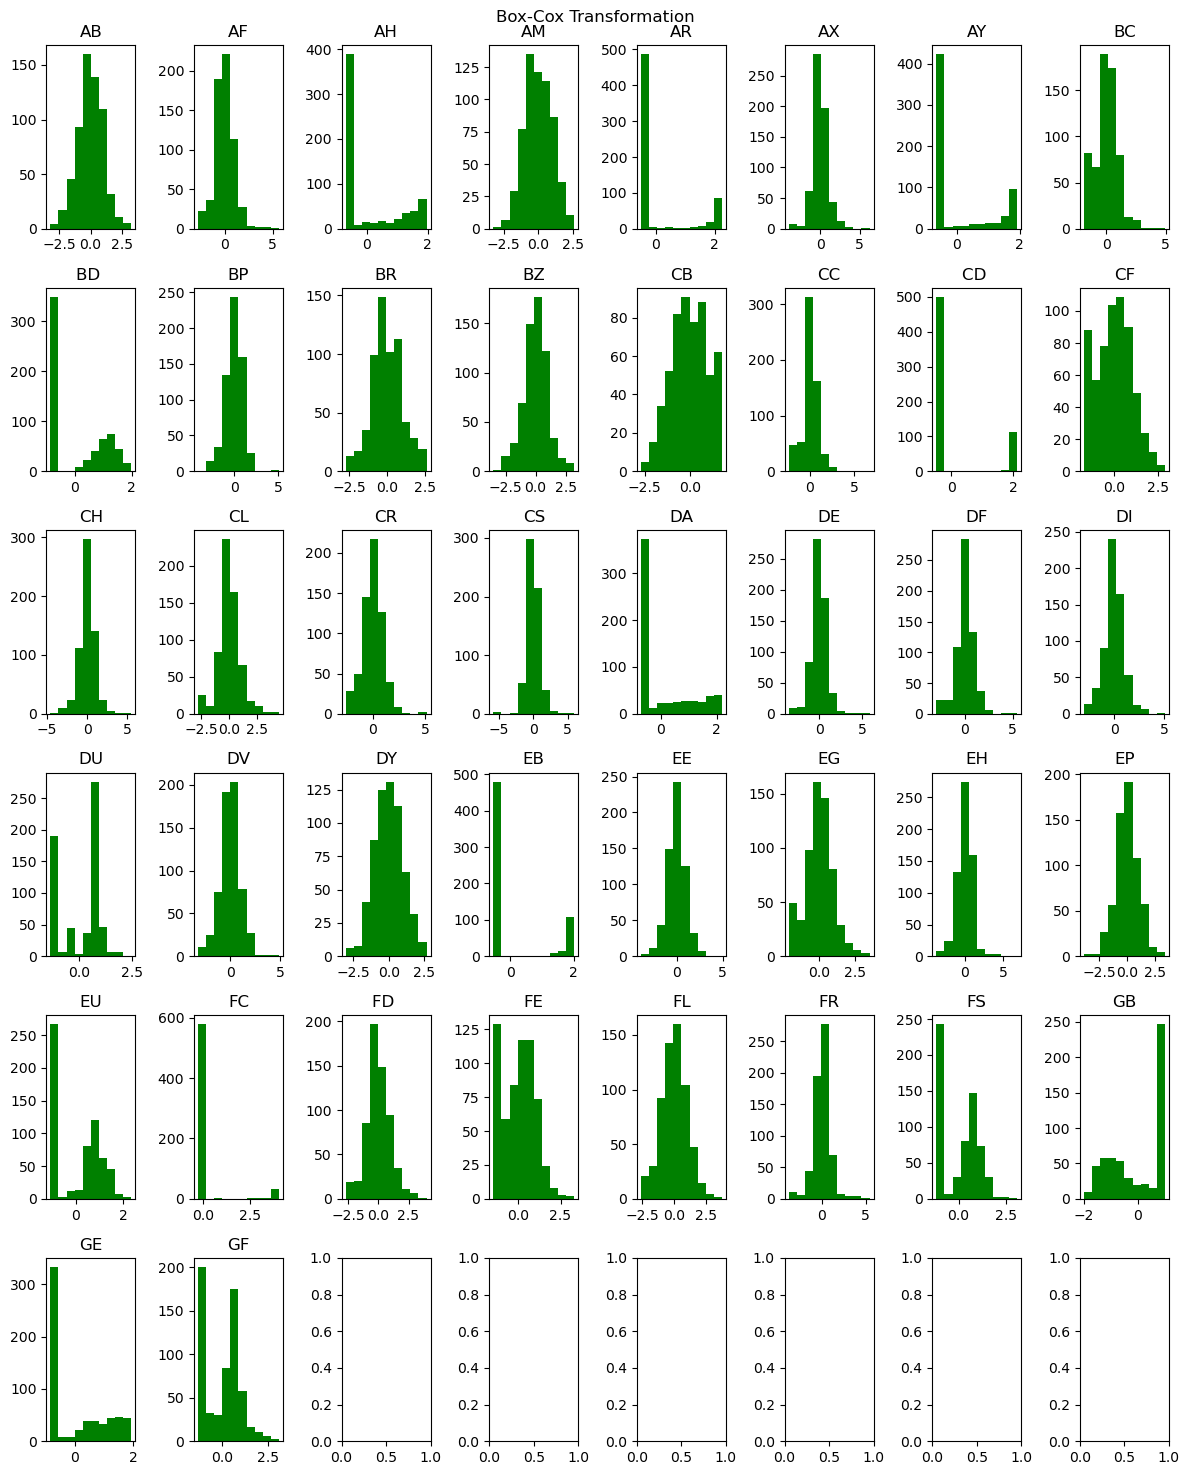

In [31]:
num_plots = len(extreme_right_skewed_columns)
num_rows = num_plots // 8 + (num_plots % 8 > 0)

fig, axes = plt.subplots(num_rows, 8, figsize=(12, 2.5 * num_rows))
for i, column in enumerate(extreme_right_skewed_columns):
    ax = axes[i // 8, i % 8]
    ax.hist(num_features_boxcox[:, i], color='green')
    ax.set_title(column) 
fig.suptitle("Box-Cox Transformation")
plt.tight_layout()
plt.show()

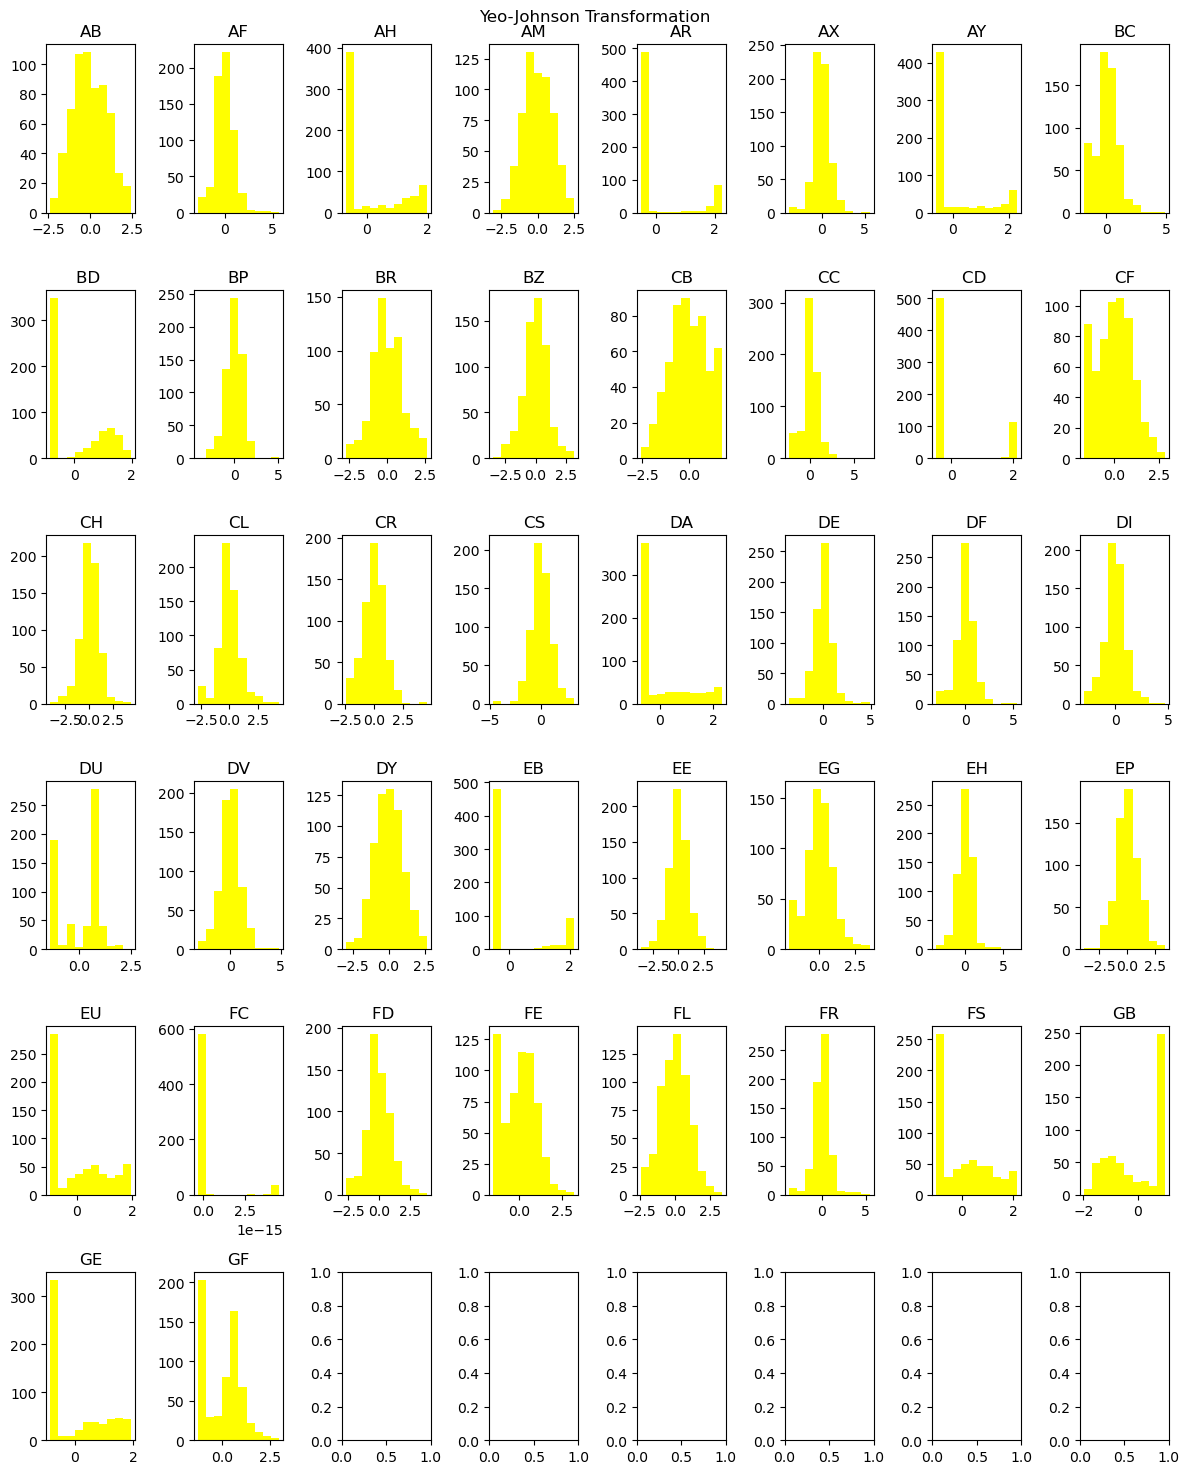

In [32]:
num_features_yeo = num_features.copy()
num_features_yeo = PowerTransformer().fit_transform(num_features_yeo) #Yeo - Johnson
num_columns = num_features.columns #store all column names as we lost this information using fit_transform

num_plots = len(extreme_right_skewed_columns)
num_rows = num_plots // 8 + (num_plots % 8 > 0)

fig, axes = plt.subplots(num_rows, 8, figsize=(12, 2.5 * num_rows))
for i, column in enumerate(extreme_right_skewed_columns):
    ax = axes[i // 8, i % 8]
    ax.hist(num_features_yeo[:, i], color='yellow')
    ax.set_title(column) 
fig.suptitle("Yeo-Johnson Transformation")
plt.tight_layout()
plt.show()

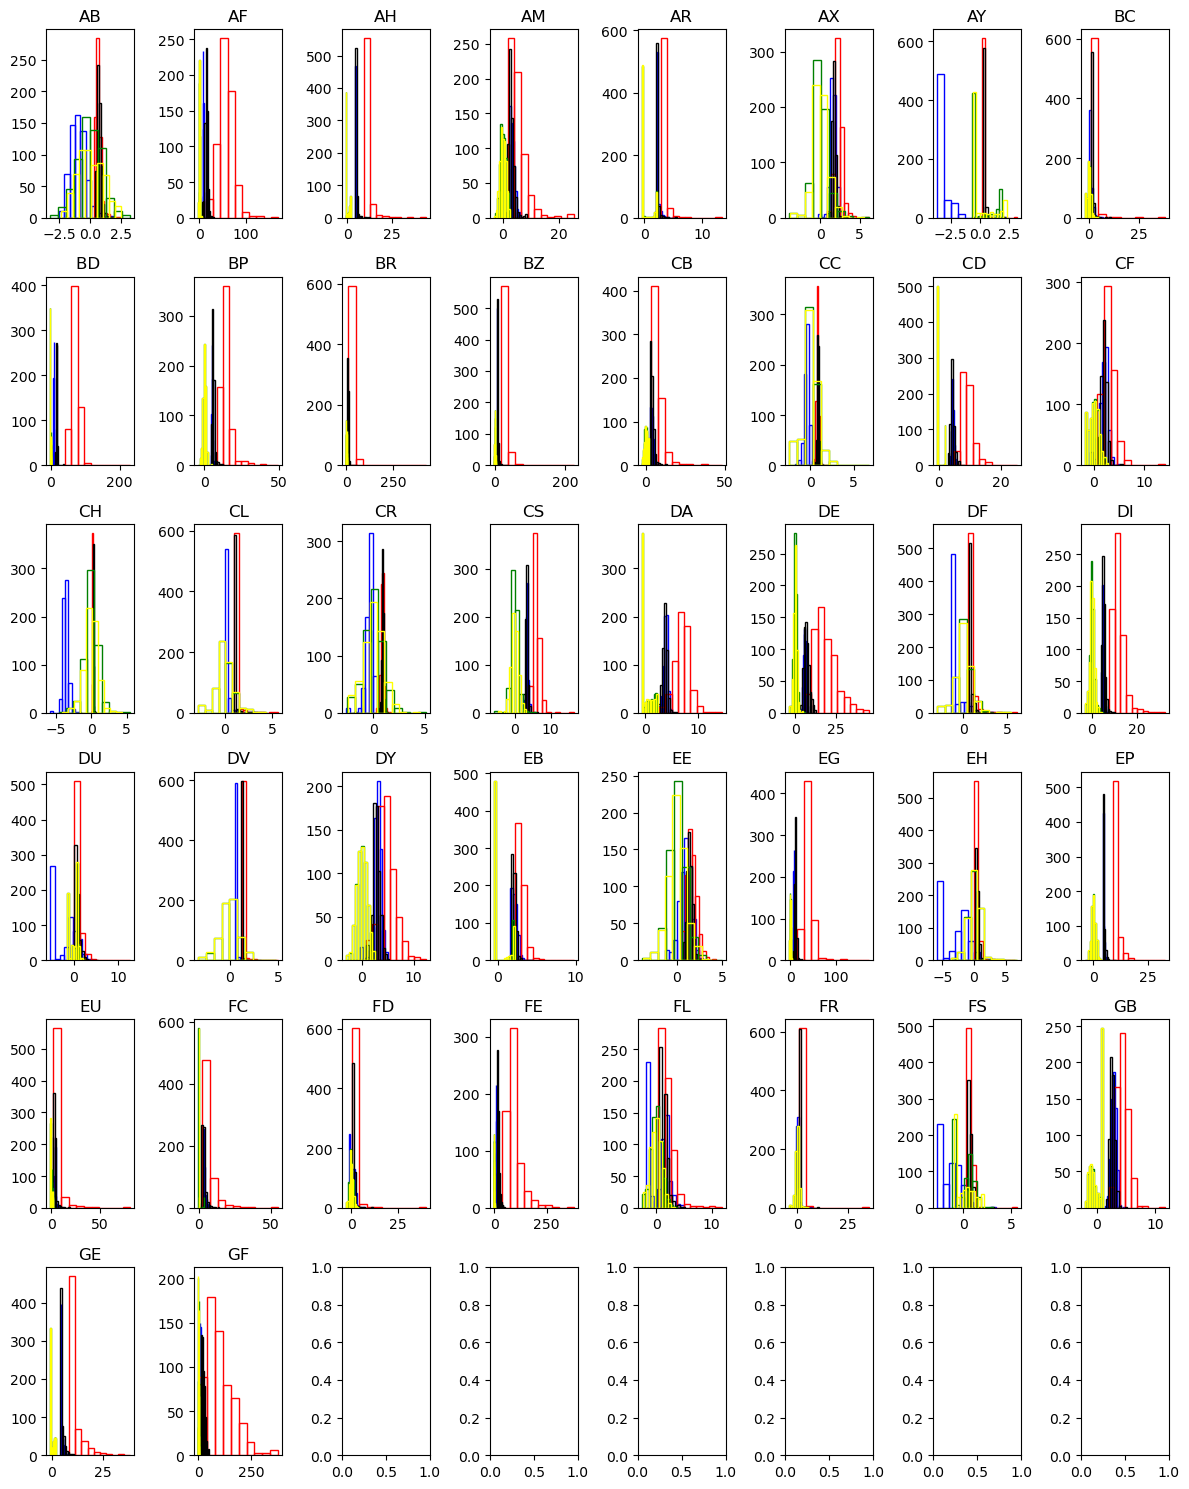

In [33]:
# show those histogram together
num_plots = len(extreme_right_skewed_columns)
num_rows = num_plots // 8 + (num_plots % 8 > 0)

fig, axes = plt.subplots(num_rows, 8, figsize=(12, 2.5 * num_rows))
for i, column in enumerate(extreme_right_skewed_columns):
    ax = axes[i // 8, i % 8]
    # ax.hist(num_features[column], edgecolor='pink', facecolor='none') # original
    ax.hist(np.log(num_features[column]), edgecolor='blue', facecolor='none')# log transform
    ax.hist(np.sqrt(num_features[column]), edgecolor='red', facecolor='none') # square root transform
    ax.hist(np.cbrt(num_features[column]), edgecolor='black', facecolor='none') # cube root transform
    ax.hist(num_features_boxcox[:, i], edgecolor='green', facecolor='none') # cox-box transform
    ax.hist(num_features_yeo[:, i], edgecolor='yellow', facecolor='none') # Yeo-Johnson transform
    ax.set_title(column)
plt.tight_layout()
plt.show()

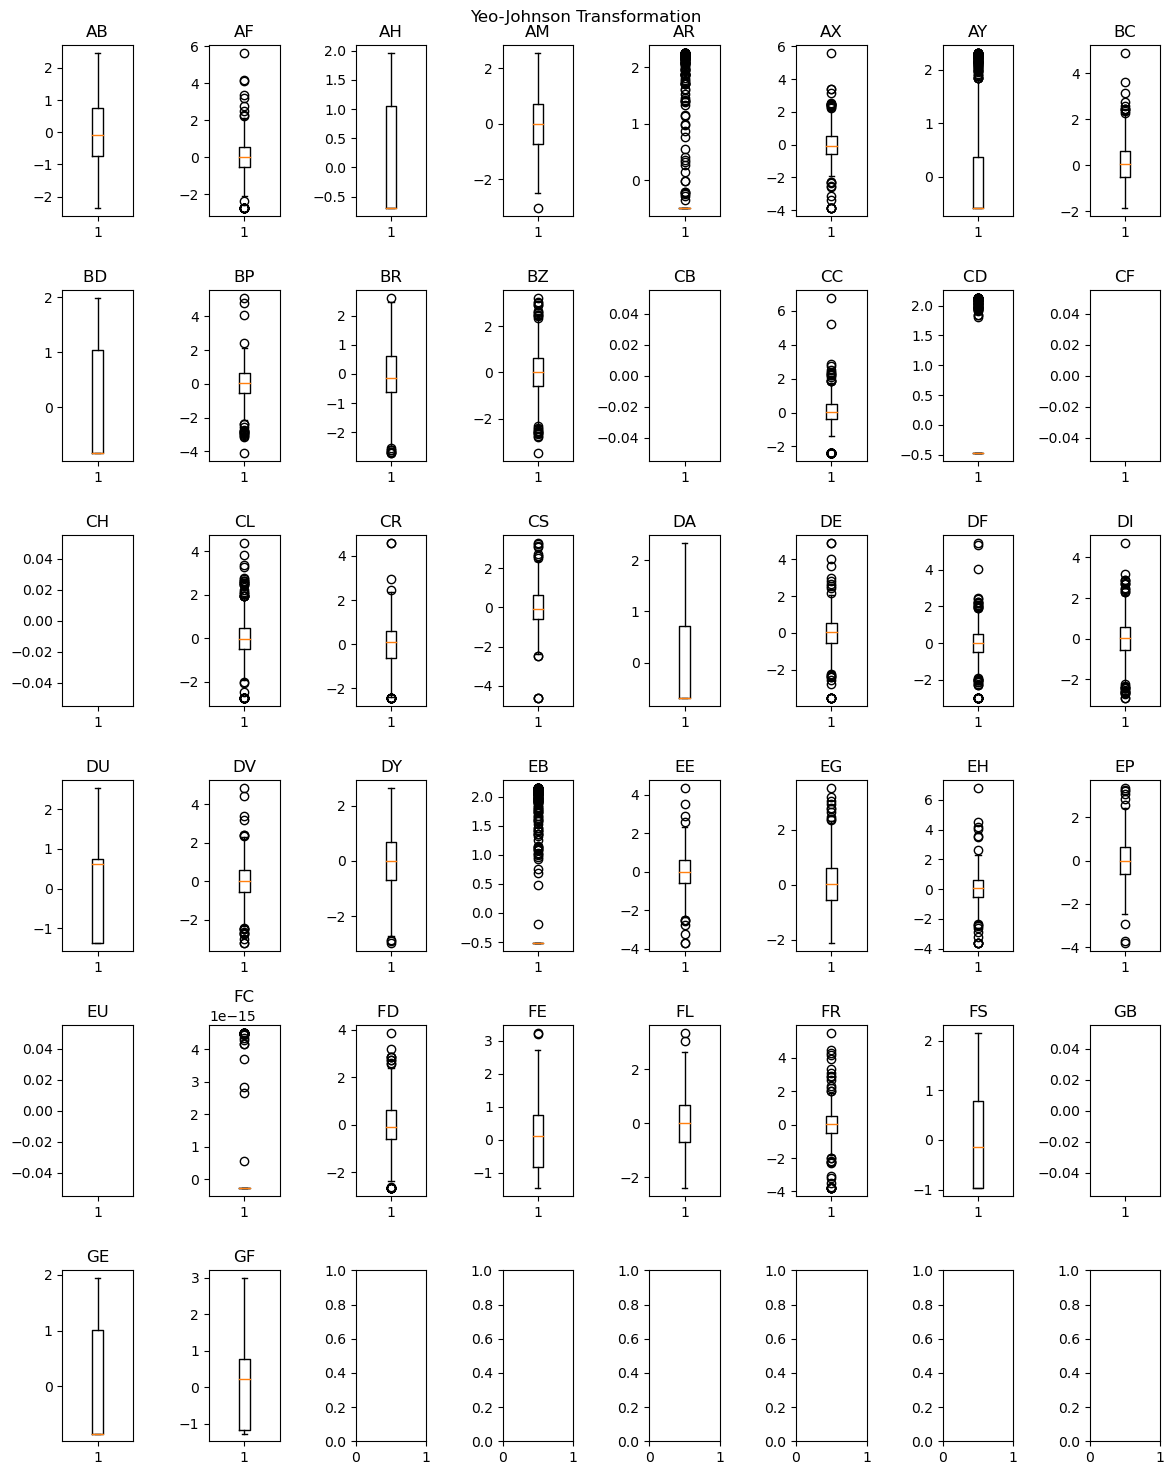

In [34]:
# We use Yeo-Johnson transformation (a common power transformation, not a function transformation) for numerical features 
num_features_yeo = num_features.copy()
num_features_yeo = PowerTransformer().fit_transform(num_features_yeo) #Yeo - Johnson
num_columns = num_features.columns #store all column names as we lost this information using fit_transform

num_plots = len(extreme_right_skewed_columns)
num_rows = num_plots // 8 + (num_plots % 8 > 0)

fig, axes = plt.subplots(num_rows, 8, figsize=(12, 2.5 * num_rows))
for i, column in enumerate(extreme_right_skewed_columns):
    ax = axes[i // 8, i % 8]
    ax.boxplot(num_features_yeo[:, i])
    ax.set_title(column) 
fig.suptitle("Yeo-Johnson Transformation")
plt.tight_layout()
plt.show()

<Axes: >

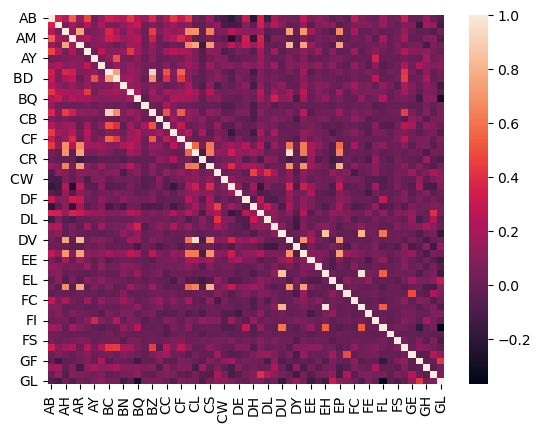

In [35]:
sns.heatmap(num_features.corr())

### Distribution for Categorical Feature

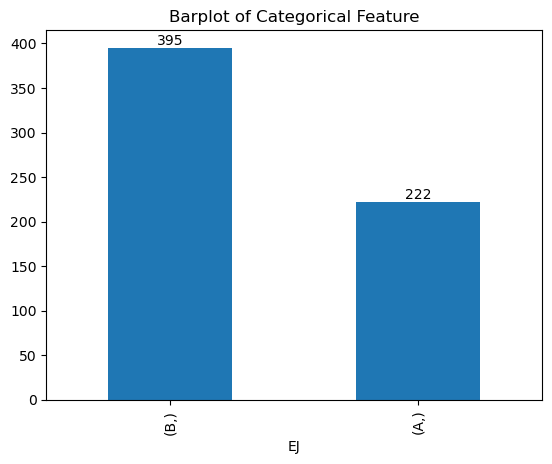

In [36]:
cat_features.value_counts().plot(kind='bar')
plt.title("Barplot of Categorical Feature")
for i, v in enumerate(cat_features.value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

num_columns = num_features.columns #store all column names as we lost this information using fit_transform### Create Data Pipeline

### Outliers

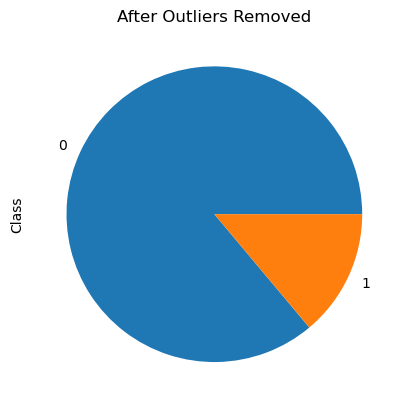

In [37]:
# Remove outliers using percentile
# ref: https://www.youtube.com/watch?v=7sJaRHF03K8
# Step 1: Calculate lower and upper thresholds for each feature
lower_threshold = num_features.quantile(0.05)
upper_threshold = num_features.quantile(0.95)

# Step 2: Iterate over rows and count outliers
outlier_count = num_features.apply(lambda row: np.sum((row < lower_threshold) | (row > upper_threshold)), axis=1)

# Step 3: Remove rows with more than eight outlier-features 
dataset_no_outlier = dataset[outlier_count <= 8]
# Step 4: Plot
dataset_no_outlier['Class'].value_counts().plot(kind='pie')
plt.title("After Outliers Removed")
plt.show()

## Data Preprocessing and Feature Selection
#### Pipeline A: Yeo-Johnson Transformation -> Remove Outlier -> Simple Imputation for the Missing Data -> SMOTE -> FS
#### Pipeline B: Yeo-Johnson Transformation -> Remove Outlier -> Simple Imputation for the Missing Data -> SMOTETomek -> FS
#### Pipeline C: Yeo-Johnson Transformation -> Keep Outlier -> Drop All the Missing Data -> SMOTETomek -> FS
#### Pipeline D: No Transformation -> Remove Outlier -> Simple Imputation for the Missing Data -> SMOTETomek -> FS
#### Pipeline E: No Transformation -> Keep Outlier -> Drop All the Missing Data -> SMOTE -> FS

In [38]:
"""
# Preprocessing Pipeline A
# Yeo-Johnson Transformation -> Remove Outlier -> Simple Imputation for the Missing Data -> SMOTE

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import balanced_accuracy_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import log_loss

# Function for outlier removal
def remove_outliers(X):
    outlier_count = np.apply_along_axis(lambda row: np.sum((row < np.percentile(row, 5)) | (row > np.percentile(row, 95))), axis=1, arr=X)
    X_no_outlier = X[outlier_count <= 8]
    return X_no_outlier

# Function for linear regression imputation
'''
def impute_with_linear_regression(X):
    target_col = X.columns[0]  # target column is always the first column, for example, BQ or EL

    X_missing_target = X[X[target_col].isnull()]
    X_non_missing = X.dropna(subset=[target_col] + list(top_features_el), how='any')

    X_explanatory_missing = X_missing_target.drop(target_col, axis=1)
    
    y_explanatory_non_missing = X_non_missing[target_col]
    X_explanatory_non_missing = X_non_missing.drop(target_col, axis=1)

    imputation_model = LinearRegression()
    imputation_model.fit(X_explanatory_non_missing, y_explanatory_non_missing)
    imputed_values = imputation_model.predict(X_explanatory_missing)

    X.loc[X[target_col].isnull(), target_col] = imputed_values

    return X
'''

# Step 1: Split data into X (features), y (target variable), cat_features and num_features
dataset = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")
X = dataset.drop(dataset[['Class', 'Id']], axis=1)
y = dataset['Class']

cat_features = X[['EJ']]
num_features = X.select_dtypes(include='float64')

# Step 2: Define preprocessing intermediate steps and varaibles
#correlation_matrix = num_features.select_dtypes(include='float64').corr()
# BQ and EL have many missing values, so we choose a bigger model (with 60 variables)
# The rest have on a tiny proportion of missing values, so we choose to use SimpleImputer
# Side note: .get_indexer and .index are different. The former one returns the index number, the latter returns the name
#top_features_bq = correlation_matrix['BQ'].sort_values(ascending=False)[1:61].index
#top_features_el = correlation_matrix['EL'].sort_values(ascending=False)[1:61].index

# Step 3: Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('yeo_johnson', PowerTransformer()),
    ('outlier_removal', FunctionTransformer(remove_outliers, validate=False)),
    #('imputation_bq', FunctionTransformer(func=impute_with_linear_regression, validate=False),['BQ'] + list(top_features_bq)),
    #('imputation_el', FunctionTransformer(func=impute_with_linear_regression, validate=False),['EL'] + list(top_features_el)),
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
])

# Step 4: Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, num_features.columns),
        ('cat', categorical_transformer, cat_features.columns)
    ],remainder = 'passthrough')

# Step 5: Define the pipeline
pipeline_A = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Step 6: Fit and transform the training data using the preprocessing pipeline
X_preprocessed = pipeline_A.fit_transform(X)

# Step 7: Apply SMOTE to oversample the minority class
smote = SMOTE()
X_preprocessed_oversampled, y_oversampled = smote.fit_resample(X_preprocessed, y)

print(X.shape)
print(X_preprocessed.shape)
print(X_preprocessed_oversampled.shape)
print(y_oversampled.shape)
X_preprocessed_oversampled[1].view()

# Step 6: Fit the preprocessing pipeline to the training data
#preprocessor.fit(X)

# Step 7: Transform the training data using the fitted preprocessing pipeline
#X_preprocessed = preprocessor.transform(X)
#print(X_preprocessed.shape)

# Step 8: Oversample the minority class using SMOTE
#X_preprocessed_oversampled = pipeline_A.fit_transform(X, y)

#print(X_preprocessed_oversampled.shape)
#print(y_preprocessed_oversampled.shape)
"""

'\n# Preprocessing Pipeline A\n# Yeo-Johnson Transformation -> Remove Outlier -> Simple Imputation for the Missing Data -> SMOTE\n\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.preprocessing import PowerTransformer, FunctionTransformer, OneHotEncoder\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import balanced_accuracy_score, make_scorer\nfrom imblearn.over_sampling import SMOTE\nfrom sklearn.metrics import log_loss\n\n# Function for outlier removal\ndef remove_outliers(X):\n    outlier_count = np.apply_along_axis(lambda row: np.sum((row < np.percentile(row, 5)) | (row > np.percentile(row, 95))), axis=1, arr=X)\n    X_no_outlier = X[outlier_count <= 8]\n    return X_no_outlier\n\n# Function for linear regression imputation\n\'\'\'\ndef impute_with_linear_regression(X):\n    target_col = X.columns[0]  # target c

In [39]:
# Preprocessing Pipeline B
# Yeo-Johnson Transformation -> Remove Outlier -> Simple Imputation for the Missing Data -> SMOTETomek

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import balanced_accuracy_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import log_loss

# Function for outlier removal
def remove_outliers(X):
    outlier_count = np.apply_along_axis(lambda row: np.sum((row < np.percentile(row, 5)) | (row > np.percentile(row, 95))), axis=1, arr=X)
    X_no_outlier = X[outlier_count <= 8]
    return X_no_outlier


# Step 1: Split data into X (features), y (target variable), cat_features and num_features
dataset = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/train.csv")
X = dataset.drop(dataset[['Class', 'Id']], axis=1)
y = dataset['Class']
cat_features = X[['EJ']]
num_features = X.select_dtypes(include='float64')

# Step 2: Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('yeo_johnson', PowerTransformer()),
    ('outlier_removal', FunctionTransformer(remove_outliers, validate=False)),
    #('imputation_bq', FunctionTransformer(func=impute_with_linear_regression, validate=False),['BQ'] + list(top_features_bq)),
    #('imputation_el', FunctionTransformer(func=impute_with_linear_regression, validate=False),['EL'] + list(top_features_el)),
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
])

# Step 3: Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, num_features.columns),
        ('cat', categorical_transformer, cat_features.columns)
    ],remainder = 'passthrough')

# Step 4: Define the pipeline
pipeline_B = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Step 5: Fit and transform the training data using the preprocessing pipeline
X_preprocessed = pipeline_B.fit_transform(X)

# Step 6: Apply SMOTE to oversample the minority class
# Apply SMOTETomek technique
smt = SMOTETomek(random_state=12)
X_preprocessed_oversampled, y_oversampled = smt.fit_resample(X_preprocessed, y)

print(X.shape)
print(X_preprocessed.shape)
print(X_preprocessed_oversampled.shape)
print(y_oversampled.shape)
X_preprocessed_oversampled[1].view()

(617, 56)
(617, 57)
(1018, 57)
(1018,)


array([-1.63910774e+00, -1.51383163e+00, -7.01177709e-01,  6.59660731e-01,
       -4.96579447e-01, -8.72855887e-01, -5.93569277e-01,  7.21886730e-01,
       -8.37500832e-01,  3.43209740e-01, -6.34780054e-01, -5.85859362e-01,
       -1.21939407e+00, -2.41314711e+00, -4.80968377e-01, -3.63214836e-01,
       -1.03560836e+00, -1.03349637e+00, -4.03298492e-01,  3.20843462e-01,
       -7.98020317e-02,  1.37129204e+00, -6.23033805e-01,  3.31265918e-02,
        7.05500629e-01,  9.79664743e-01, -7.69090461e-01, -5.23793149e-01,
        4.48665839e-02, -3.68421890e-01, -6.54776044e-01,  1.34175351e+00,
       -9.43142389e-01, -2.77555756e-16, -3.92482265e-01, -1.47601184e+00,
       -1.51827265e+00, -4.88620631e-01, -9.76140178e-01,  1.00003938e+00,
        3.98386981e-01,  8.26539274e-01, -1.43818064e+00, -1.10019839e+00,
       -1.27153582e-01,  1.51016207e-01, -1.13282601e+00, -1.35174383e+00,
        9.41409382e-01, -1.58674244e+00, -7.82682644e-01,  1.04754362e+00,
       -1.43006879e-01, -

## Feature Selection
    - ref 1: https://www.youtube.com/watch?v=7tW29jBceRw
    - ref 2: https://www.youtube.com/watch?v=LTE7YbRexl8

In [40]:
# Assuming X_preprocessed_oversampled is a NumPy array containing your features
# and y_oversampled is a Series containing the binary label (0 or 1)

# Convert X_preprocessed_oversampled into a DataFrame and create column names
X_preprocessed_oversampled_df = pd.DataFrame(X_preprocessed_oversampled, 
                                             columns=['feature'+str(i) for i in range(X_preprocessed_oversampled.shape[1])])

# Concatenate the features DataFrame and the binary label Series
data = pd.concat([X_preprocessed_oversampled_df, y_oversampled], axis=1)

# Group by the binary label and calculate the variance for each feature within each group
variance_by_class = data.groupby(y_oversampled)[X_preprocessed_oversampled_df.columns].var().round(3)

print(variance_by_class)

       feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
Class                                                                         
0         0.911     0.822     0.999      0.93     0.873     0.935     1.050   
1         0.751     1.090     0.698      0.98     1.227     1.016     0.442   

       feature7  feature8  feature9  ...  feature47  feature48  feature49  \
Class                                ...                                    
0         0.975     0.907     0.904  ...      0.856      0.968      0.945   
1         0.893     0.933     0.862  ...      1.250      0.884      0.820   

       feature50  feature51  feature52  feature53  feature54  feature55  \
Class                                                                     
0          1.023      1.001      0.928      1.000      0.993      0.236   
1          0.632      0.574      0.933      0.812      0.795      0.167   

       feature56  
Class             
0          0.236  
1          0.167

In [41]:
from sklearn.feature_selection import VarianceThreshold

# Create the VarianceThreshold object with the threshold set to 0.25
vt = VarianceThreshold(threshold=0.25)

# Fit the VarianceThreshold to the data and transform the data after feature selection
vt.fit(X_preprocessed_oversampled)

# Get the support array, which indicates True for features with high variance and False for features with low variance
vt.get_support()

# drop the low variance columns
# Assuming you have already performed the preprocessing steps and obtained X_preprocessed_oversampled DataFrame

# List of column indices to drop (7th, 17th, 20th, 22nd, 24th, 29th, 56th, and 57th columns)
columns_to_drop = [6, 16, 19, 21, 23, 28, 55, 56]

# Drop the specified columns from the NumPy array
X_preprocessed_oversampled_dropped = np.delete(X_preprocessed_oversampled, columns_to_drop, axis=1)

# Now X_preprocessed_oversampled_dropped will contain the DataFrame with the specified columns dropped
X_preprocessed_oversampled_dropped.shape

(1018, 49)

## Model Building

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [43]:
# usually, use Naive Bayes as a baseline for classification tasks
gnb = GaussianNB()
cv = cross_val_score(gnb, X_preprocessed_oversampled_dropped, y_oversampled, cv=5)
print(cv)
print(cv.mean())

[0.84313725 0.84313725 0.86764706 0.86699507 0.85714286]
0.8556118999323866


In [44]:
# logistic regression
lr = LogisticRegression(max_iter = 3500)
cv = cross_val_score(lr, X_preprocessed_oversampled_dropped, y_oversampled, cv=5)
print(cv)
print(cv.mean())

[0.89705882 0.93137255 0.92156863 0.90640394 0.92610837]
0.9165024630541871


In [45]:
# decision tree
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, X_preprocessed_oversampled_dropped, y_oversampled, cv=5)
print(cv)
print(cv.mean())

[0.84313725 0.92647059 0.91176471 0.91625616 0.91625616]
0.9027769728581088


In [46]:
# KNN
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_preprocessed_oversampled_dropped, y_oversampled, cv=5)
print(cv)
print(cv.mean())

[0.86764706 0.85784314 0.88235294 0.85714286 0.89162562]
0.8713223220322612


In [47]:
# Random Forest
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_preprocessed_oversampled_dropped, y_oversampled, cv=5)
print(cv)
print(cv.mean())

[0.95098039 0.94117647 0.9754902  0.97536946 0.97536946]
0.9636771950159375


In [48]:
# SVC
svc = SVC(probability=True)
cv = cross_val_score(svc, X_preprocessed_oversampled_dropped, y_oversampled, cv=5)
print(cv)
print(cv.mean())

[0.96078431 0.9754902  0.97058824 0.95566502 0.98029557]
0.9685646672462088


In [49]:
xgb = XGBClassifier(random_state=1)
cv = cross_val_score(xgb, X_preprocessed_oversampled_dropped, y_oversampled, cv=5)
print(cv)
print(cv.mean())

[0.96078431 0.94607843 0.9754902  0.98029557 0.97044335]
0.9666183714865257


#### Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For a "soft" classifier, it averages the confidence of each of the model. For more info, please check: https://towardsdatascience.com/use-voting-classifier-to-improve-the-performance-of-your-ml-model-805345f9de0e¶

In [50]:
from sklearn.ensemble import VotingClassifier
# estimator_list = [('lr', lr), ('knn', knn), ('rf', rf), ('gnb', gnb), ('svc', svc), ('xgb', xgb)]
estimator_list = [('lr', lr), ('knn', knn), ('rf', rf), ('gnb', gnb), ('xgb', xgb)]

voting_hard = VotingClassifier(estimators = estimator_list, voting = 'hard')
cv_hard = cross_val_score(voting_hard, X_preprocessed_oversampled_dropped, y_oversampled, cv=5)
print(cv_hard)
print(cv_hard.mean())

voting_soft = VotingClassifier(estimators = estimator_list, voting = 'soft')
cv_soft = cross_val_score(voting_soft, X_preprocessed_oversampled_dropped, y_oversampled, cv=5)
print(cv_soft)
print(cv_soft.mean())

[0.96078431 0.93137255 0.95588235 0.9408867  0.94581281]
0.9469477446150874
[0.95098039 0.93137255 0.95098039 0.9408867  0.94581281]
0.9440065681444991


## Model Tuned Performance

#### Using Pipeline A transformation
- Logistic Regression: 
    - Best Score: 0.9155365594513668
    - Best Parameters: {'C': 4.281332398719396, 'max_iter': 3000, 'penalty': 'l1', 'solver': 'liblinear'}
- KNN
     - Best Score: 0.9322128851540615
     - Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
- SVC
     - Best Score: 0.9882159760455907
     - Best Parameters: {'C': 10, 'degree': 4, 'kernel': 'poly'}
- Random Forest
    - Best Score: 0.9656283202936347
    - Best Parameters: {'bootstrap': True, 'criterion': 'log_loss', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120}
- XGB
    - Best Score: 0.9675939341253743
    - Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 75, 'reg_alpha': 0.5, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.55}
- __Log-loss for meta logistic regression: 0.006324218157849526__
- __Rank: 5144/5459__

In [51]:
# Grid Search
from sklearn.model_selection import GridSearchCV

# Simple Performance Reporting Function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [52]:
# logistic
lr = LogisticRegression()
param_grid = {'max_iter' : [3000],
             'penalty' : ['l1', 'l2'],
             'C' : np.logspace(-4,4,20),
             'solver' : ['liblinear']}
clf_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, verbose=True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_preprocessed_oversampled_dropped, y_oversampled)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Logistic Regression
Best Score: 0.9233652081522263
Best Parameters: {'C': 11.288378916846883, 'max_iter': 3000, 'penalty': 'l1', 'solver': 'liblinear'}


In [53]:
# knn
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
             'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
             'p' : [1,2]}
clf_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_preprocessed_oversampled_dropped, y_oversampled)
clf_performance(best_clf_knn, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.9243649183811457
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [54]:
'''
# svc
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['linear'],
                                 'C': [0.1, 1, 10]},
                                {'kernel': ['poly'],
                                 'degree': [2, 3, 4],
                                 'C': [0.1, 1, 10]}]
clf_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_preprocessed_oversampled, y_oversampled)
clf_performance(best_clf_svc, 'SVC')
'''

"\n# svc\nsvc = SVC(probability = True)\nparam_grid = tuned_parameters = [{'kernel': ['linear'],\n                                 'C': [0.1, 1, 10]},\n                                {'kernel': ['poly'],\n                                 'degree': [2, 3, 4],\n                                 'C': [0.1, 1, 10]}]\nclf_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=True, n_jobs = -1)\nbest_clf_svc = clf_svc.fit(X_preprocessed_oversampled, y_oversampled)\nclf_performance(best_clf_svc, 'SVC')\n"

In [55]:
# random forest
rf = RandomForestClassifier(random_state=1)
param_grid = {'n_estimators': [80,100,120],
             'criterion': ['log_loss'],
             'bootstrap': [True],
             'max_depth': [10,15,20,25],
             'max_features': ['log2', 'sqrt', None],
             'min_samples_leaf': [2,3],
             'min_samples_split': [2,3]}
clf_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_preprocessed_oversampled_dropped, y_oversampled)
clf_performance(best_clf_rf, 'Random Forest')

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Random Forest
Best Score: 0.9636771950159375
Best Parameters: {'bootstrap': True, 'criterion': 'log_loss', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}


In [56]:
# XGB
# doc: https://xgboost.readthedocs.io/en/latest/parameter.html
xgb = XGBClassifier(random_state = 1)
param_grid = {'n_estimators': [75,100,125],
             'colsample_bytree': [0.65,0.70],
             'max_depth': [None],
             'reg_alpha': [0.5,1],
             'reg_lambda': [2,5],
             'subsample': [0.55, 0.6],
             'learning_rate': [0.1,0.2],
             'gamma': [0.5,1],
             'min_child_weight': [0.01],
             'sampling_method': ['uniform']}

clf_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_preprocessed_oversampled_dropped, y_oversampled)
clf_performance(best_clf_xgb, 'XGB')

Fitting 5 folds for each of 192 candidates, totalling 960 fits
XGB
Best Score: 0.9636723654979233
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 75, 'reg_alpha': 0.5, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.55}


## Stacking Ensemble Learning

In [57]:
from sklearn.metrics import log_loss
from sklearn.ensemble import StackingClassifier

# Meta Model: Logistic (default)
# Logistic Regression as the meta-model
meta_lr = LogisticRegression(solver='lbfgs')

# Stacking Ensemble Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('best_lr', best_clf_lr.best_estimator_),
        ('best_knn', best_clf_knn.best_estimator_),
        #('best_svc', best_clf_svc.best_estimator_),
        ('best_rf', best_clf_rf.best_estimator_),
        ('best_xgb', best_clf_xgb.best_estimator_)
    ],
    final_estimator= meta_lr,
    passthrough=True
)

# Fit the stacking ensemble classifier
stacking_clf.fit(X_preprocessed_oversampled_dropped, y_oversampled)

# Calculate log-loss for meta logistic regression
y_pred_proba_lr = stacking_clf.predict_proba(X_preprocessed_oversampled_dropped)
logloss_lr = log_loss(y_oversampled, y_pred_proba_lr)
print("Log-loss for meta logistic regression:", logloss_lr)

Log-loss for meta logistic regression: 0.012452860436276946


## Testing

In [58]:
# Use pipeline to transform
dataset_test = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/test.csv")

# Step 1: Split data into X (features), y (target variable), cat_features and num_features
X_test = dataset_test.drop('Id', axis=1)

cat_features = X_test[['EJ']]
num_features = X_test.select_dtypes(include='float64')

# Step 2: Fit and transform the training data using the preprocessing pipeline
X_test.loc[X_test.index[0], "EJ"] = "B" # add some randomness so that I could use OneHot
X_test_preprocessed = pipeline_B.fit_transform(X_test)
print(X_test_preprocessed.shape)
# List of column indices to drop (7th, 17th, 20th, 22nd, 24th, 29th, 56th, and 57th columns)
columns_to_drop = [6, 16, 19, 21, 23, 28, 55, 56]
X_test_preprocessed_dropped = np.delete(X_test_preprocessed, columns_to_drop, axis=1)

# Step 3: Predict
y_test_pred = stacking_clf.predict_proba(X_test_preprocessed_dropped)
y_test_pred = y_test_pred.clip(0.075, 0.925)

(5, 57)


In [59]:
sample_submission = pd.read_csv("/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv")
sample_submission[['class_0', 'class_1']] = y_test_pred
sample_submission.to_csv('/kaggle/working/submission.csv', index=False)